# **Mini-Projet: Prédiction du Revenu Annuel des Marocains**

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px; border-left: 5px solid #4682b4;"> <h2 style="color: #4682b4;">🎯 Objectif du projet</h2> <p>L'objectif de ce projet est de simuler et analyser les <strong>revenus des citoyens marocains</strong> à partir de données <strong>socio-démographiques réalistes</strong> en respectant les statistiques du <strong>HCP (Haut-Commissariat au Plan)</strong>. Le projet inclut la génération de données synthétiques, leur nettoyage, puis l'application d'un modèle de Machine Learning pour <strong>prédire</strong> le revenu.</p> </div>

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import joblib
import warnings
warnings.filterwarnings('ignore')
print("Bibliothèques importées avec succès!")

Bibliothèques importées avec succès!


# Configuration pour l'affichage des graphiques

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 1. Chargement des données

## 1.1 Chargement et Aperçu des Données

In [3]:
# Chargement du dataset
df = pd.read_csv('dataset_revenu_marocains.csv')

# Affichage des premières lignes
print("Aperçu des 10 premières lignes du dataset:")
df.head(10)

Aperçu des 10 premières lignes du dataset:


,age,sexe,milieu,etat_matrimonial,region,niveau_education,categorie_socioprofessionnelle,taille_foyer,aide_sociale,a_acces_credit,...,possede_terrain,categorie_age,annees_experience,revenu_annuel,age_en_mois,est_urbain,est_marie,id_utilisateur,date_enregistrement,code_postal
0,56,Femme,Urbain,Marié,Casablanca-Settat,Secondaire,Groupe 5,3.0,0,0,...,0,Sénior,33.0,16343,672,1,1,1,2025-05-13,14831
1,69,Femme,Urbain,Marié,Casablanca-Settat,Fondamental,Groupe 4,2.0,0,0,...,1,Âgé,51.0,15051,828,1,1,2,2025-05-13,37530
2,32,Homme,Urbain,Marié,L'Oriental,Secondaire,Groupe 5,9.0,0,0,...,0,Adulte,11.0,5440,384,1,1,4,2025-05-13,49563
3,60,Femme,Urbain,Marié,Rabat-Salé-Kénitra,Fondamental,Groupe 4,8.0,0,1,...,0,Sénior,42.0,15768,720,1,1,5,2025-05-13,61558
4,78,Femme,Urbain,Divorcé,Laâyoune-Sakia El Hamra,Fondamental,Groupe 3,7.0,0,0,...,0,Âgé,62.0,28882,936,1,0,7,2025-05-13,26313
5,38,Homme,Urbain,Marié,Fès-Meknès,Fondamental,Groupe 2,3.0,1,1,...,0,Adulte,20.0,16986,456,1,1,8,2025-05-13,15664
6,112,Homme,Urbain,Divorcé,Casablanca-Settat,Sans niveau,Groupe 5,9.0,0,0,...,0,Adulte,19.0,2597,432,1,0,11,2025-05-13,98737
7,28,Homme,Urbain,Marié,Casablanca-Settat,Fondamental,Groupe 4,2.0,0,1,...,0,Jeune,10.0,4396,336,1,1,13,2025-05-13,14257
8,28,Femme,Urbain,Veuf,Rabat-Salé-Kénitra,NaN,Groupe 2,4.0,0,0,...,0,Jeune,6.0,15823,336,1,0,14,2025-05-13,88982
9,41,Homme,Urbain,Marié,Casablanca-Settat,Secondaire,Groupe 4,NaN,0,1,...,0,Adulte,19.0,13437,492,1,1,15,2025-05-13,37663


## 1.2 Informations sur le Dataset

Examinons les dimensions du dataset et les types de données de chaque colonne.

In [4]:
# Dimensions du dataset
print(f"Dimensions du dataset: {df.shape[0]} lignes × {df.shape[1]} colonnes")

# Informations sur le dataset
print("\nInformations détaillées sur le dataset:")
df.info()

Dimensions du dataset: 40000 lignes × 23 colonnes

Informations détaillées sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             40000 non-null  int64  
 1   sexe                            40000 non-null  object 
 2   milieu                          40000 non-null  object 
 3   etat_matrimonial                40000 non-null  object 
 4   region                          40000 non-null  object 
 5   niveau_education                37972 non-null  object 
 6   categorie_socioprofessionnelle  40000 non-null  object 
 7   taille_foyer                    38020 non-null  float64
 8   aide_sociale                    40000 non-null  int64  
 9   a_acces_credit                  40000 non-null  int64  
 10  a_retraite                      40000 non-null  int64  
 11  po

## 1.3 Statistiques Descriptives

Examinons les statistiques descriptives des variables numériques pour comprendre leur distribution centrale et leur dispersion.

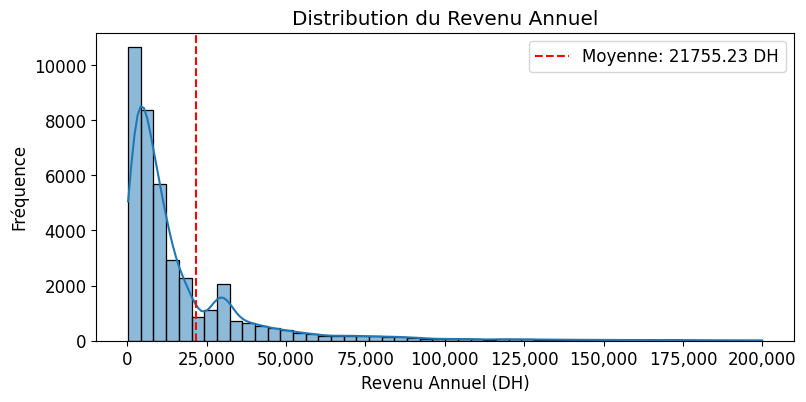

In [5]:
from matplotlib.ticker import FuncFormatter
# Distribution du revenu annuel (style demandé)
plt.figure(figsize=(9, 4))
sns.histplot(df[df['revenu_annuel'] < 200000]['revenu_annuel'], kde=True, bins=50)
plt.title('Distribution du Revenu Annuel')
plt.xlabel('Revenu Annuel (DH)')
plt.ylabel('Fréquence')
plt.axvline(df['revenu_annuel'].mean(), color='red', linestyle='--',
            label=f'Moyenne: {df["revenu_annuel"].mean():.2f} DH')
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend()
plt.show()

In [6]:
# Statistiques descriptives des variables numériques pertinentes pour la prédiction du revenu
print("Statistiques descriptives des variables pertinentes pour la prédiction du revenu annuel :")
key_cols = ['age', 'annees_experience', 'taille_foyer', 'a_acces_credit', 'a_retraite', 'possede_voiture', 'possede_logement', 'possede_terrain',
    'revenu_annuel']
df[key_cols].describe().T.round(2)

Statistiques descriptives des variables pertinentes pour la prédiction du revenu annuel :


,count,mean,std,min,25%,50%,75%,max
age,40000.0,49.11,18.82,18.0,33.0,49.0,65.0,119.0
annees_experience,38059.0,29.07,17.95,0.0,14.0,29.0,45.0,64.0
taille_foyer,38020.0,5.00,2.57,1.0,3.0,5.0,7.0,9.0
a_acces_credit,40000.0,0.44,0.50,0.0,0.0,0.0,1.0,1.0
a_retraite,40000.0,0.32,0.47,0.0,0.0,0.0,1.0,1.0
possede_voiture,38034.0,0.30,0.46,0.0,0.0,0.0,1.0,1.0
possede_logement,38017.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0
possede_terrain,40000.0,0.20,0.40,0.0,0.0,0.0,0.0,1.0
revenu_annuel,40000.0,21755.23,45128.91,318.0,4081.0,8973.5,20511.5,599614.0


<div style="background-color: #f9f9f9; padding: 20px; border-radius: 10px; border-left: 6px solid #4caf50; font-family: Arial, sans-serif;">

<h2 style="color: #4caf50;">Interprétation des statistiques descriptives des variables numériques pertinentes</h2>

<h3 style="color: #333333;">revenu_annuel</h3>
<ul>
  <li><strong>Moyenne</strong> : 21 755 DH/an</li>
  <li><strong>Écart-type</strong> : 45 129 DH — très élevé, indique une <strong>forte dispersion</strong>.</li>
  <li><strong>Min - Max</strong> : de 318 à <strong>599 614 DH</strong> — présence de <strong>valeurs extrêmes</strong>.</li>
  <li><strong>Médiane (50%)</strong> : 8 973 DH — distribution <strong>asymétrique à droite</strong>.</li>
</ul>
<p style="color: #888;"><em>Remarque :</em> variable très déséquilibrée. Une transformation logarithmique ou un traitement des outliers est recommandé.</p>

<h3 style="color: #333333;">age</h3>
<ul>
  <li><strong>Moyenne</strong> : 49 ans</li>
  <li><strong>Min - Max</strong> : 18 - 119 — quelques <strong>valeurs aberrantes</strong>.</li>
  <li>75 % ont moins de 65 ans — majorité en âge actif.</li>
</ul>
<p style="color: #888;">Peut influencer le revenu, notamment combiné au statut de retraite.</p>

<h3 style="color: #333333;">annees_experience</h3>
<ul>
  <li><strong>Moyenne</strong> : 29 ans</li>
  <li><strong>Min - Max</strong> : 0 - 64</li>
</ul>
<p style="color: #888;">Forte corrélation probable avec le revenu.</p>

<h3 style="color: #333333;">a_acces_credit</h3>
<ul>
  <li><strong>Moyenne</strong> : 0.44 — 44 % des individus ont accès au crédit</li>
  <li>Binaire : 0 = non, 1 = oui</li>
</ul>
<p style="color: #888;">Indicateur de santé financière, probablement corrélé au revenu.</p>

<h3 style="color: #333333;">a_retraite</h3>
<ul>
  <li><strong>Moyenne</strong> : 0.32 — 32 % sont à la retraite</li>
</ul>
<p style="color: #888;">Les retraités ont souvent un revenu fixe ou plus faible.</p>

<h3 style="color: #333333;">possede_voiture</h3>
<ul>
  <li><strong>Moyenne</strong> : 0.30 — 30 % possèdent une voiture</li>
</ul>
<p style="color: #888;">Peut refléter le niveau de vie.</p>

<h3 style="color: #333333;">possede_logement</h3>
<ul>
  <li><strong>Moyenne</strong> : 0.60 — 60 % possèdent leur logement</li>
</ul>
<p style="color: #888;">Indicateur de stabilité économique.</p>

<h3 style="color: #333333;">possede_terrain</h3>
<ul>
  <li><strong>Moyenne</strong> : 0.20 — 20 % possèdent un terrain</li>
</ul>
<p style="color: #888;">Peut indiquer une certaine richesse, notamment en milieu rural.</p>

<h3 style="color: #4caf50;">Conclusion</h3>
<ul>
  <li>Le dataset présente une forte hétérogénéité avec des valeurs extrêmes.</li>
  <li>Les variables sélectionnées sont pertinentes pour expliquer le revenu annuel.</li>
  <li>Une préparation rigoureuse des données est nécessaire : traitement des outliers, transformations, normalisation.</li>
</ul>

</div>


In [16]:
import pandas as pd
import sweetviz as sv
from IPython.display import IFrame, display


# Générer le rapport
rapport = sv.analyze(df)
rapport_path = "rapport_sweetviz.html"

# Générer le fichier HTML sans ouvrir le navigateur
rapport.show_html(rapport_path, open_browser=False)

# Attendre que le fichier soit bien généré, puis l'afficher dans le notebook
display(IFrame(src=rapport_path, width=1000, height=600))

                                             |                                                      | [  0%]  …

Report rapport_sweetviz.html was generated.


### 📊 Interprétation des résultats de l'analyse Sweetviz
<div style="background: linear-gradient(to right, #6a11cb, #2575fc); padding: 15px; border-radius: 10px; color: white; margin-bottom: 20px;"> <h2 style="color: white; margin: 0; text-align: center;">Analyse exploratoire des données sur le revenu annuel des Marocains</h2> </div>
Après avoir analysé le rapport Sweetviz généré pour notre dataset sur le revenu annuel des Marocains, nous pouvons tirer les conclusions suivantes :

### 💰 Distribution du revenu annuel
<div style="background-color: #f0f7ff; padding: 15px; border-radius: 10px; border-left: 5px solid #4285f4; margin-bottom: 20px;"> <p>La variable cible "<strong>revenu_annuel</strong>" présente une distribution <em>asymétrique à droite</em> (skewed right), ce qui est typique des distributions de revenus. Cette asymétrie indique que :</p> <ul style="list-style-type: none; padding-left: 10px;"> <li>🔹 La <strong>majorité</strong> de la population se situe dans les <strong>tranches de revenus inférieurs</strong></li> <li>🔹 Une <strong>minorité</strong> de personnes dispose de revenus <strong>très élevés</strong>, créant une "queue" à droite de la distribution</li> <li>🔹 La <strong>médiane</strong> du revenu est significativement <strong>inférieure à la moyenne</strong> (<span style="color: #e63946; font-weight: bold;">21.949 DH/an</span>), confirmant que plus de <span style="color: #e63946; font-weight: bold;">71,8%</span> de la population se trouve sous la moyenne nationale</li> </ul> </div>

### 🏙️ Disparités géographiques
<div style="background-color: #f2fcf5; padding: 15px; border-radius: 10px; border-left: 5px solid #34a853; margin-bottom: 20px;"> <p>L'analyse comparative entre milieu urbain et rural révèle des écarts importants :</p> <ul style="list-style-type: none; padding-left: 10px;"> <li>🔹 Le revenu moyen en milieu <strong>urbain</strong> (<span style="color: #34a853; font-weight: bold;">26.988 DH/an</span>) est <strong>plus de deux fois supérieur</strong> au revenu moyen en milieu <strong>rural</strong> (<span style="color: #34a853; font-weight: bold;">12.862 DH/an</span>)</li> <li>🔹 La <strong>dispersion des revenus</strong> est plus importante en milieu urbain, suggérant des <strong>inégalités plus marquées</strong></li> <li>🔹 En milieu rural, la distribution est <strong>encore plus asymétrique</strong>, avec une concentration plus forte dans les tranches de revenus faibles</li> </ul> </div>

### 🔍 Facteurs déterminants du revenu
<div style="background-color: #fff8f0; padding: 15px; border-radius: 10px; border-left: 5px solid #fbbc05; margin-bottom: 20px;"> <p>Les corrélations identifiées par Sweetviz montrent que :</p> <table style="width: 100%; border-collapse: collapse; margin-top: 10px;"> <tr style="background-color: #fbbc0520;"> <th style="padding: 8px; text-align: left; border-bottom: 2px solid #fbbc05;">Facteur</th> <th style="padding: 8px; text-align: left; border-bottom: 2px solid #fbbc05;">Impact sur le revenu</th> </tr> <tr> <td style="padding: 8px; border-bottom: 1px solid #ddd;"><strong>Niveau d'éducation</strong> 📚</td> <td style="padding: 8px; border-bottom: 1px solid #ddd;">Variable la plus fortement corrélée au revenu, avec une progression claire du niveau "sans niveau" au niveau "supérieur"</td> </tr> <tr style="background-color: #fbbc0510;"> <td style="padding: 8px; border-bottom: 1px solid #ddd;"><strong>Années d'expérience</strong> ⏱️</td> <td style="padding: 8px; border-bottom: 1px solid #ddd;">Corrélation positive significative, confirmant que l'expérience professionnelle est valorisée sur le marché du travail marocain</td> </tr> <tr> <td style="padding: 8px; border-bottom: 1px solid #ddd;"><strong>Catégorie socioprofessionnelle</strong> 👔</td> <td style="padding: 8px; border-bottom: 1px solid #ddd;">Forte association avec le revenu, les groupes 1 et 2 (cadres supérieurs et moyens) présentant des revenus nettement plus élevés</td> </tr> <tr style="background-color: #fbbc0510;"> <td style="padding: 8px; border-bottom: 1px solid #ddd;"><strong>Âge</strong> 🗓️</td> <td style="padding: 8px; border-bottom: 1px solid #ddd;">Relation non-linéaire avec le revenu, qui augmente généralement jusqu'à l'âge de la retraite puis diminue</td> </tr> <tr> <td style="padding: 8px; border-bottom: 1px solid #ddd;"><strong>Sexe</strong> ⚧️</td> <td style="padding: 8px; border-bottom: 1px solid #ddd;">Écart significatif entre hommes et femmes, les hommes ayant en moyenne des revenus plus élevés</td> </tr> </table> </div>

### ⚠️ Qualité des données
<div style="background-color: #fff0f0; padding: 15px; border-radius: 10px; border-left: 5px solid #ea4335; margin-bottom: 20px;"> <p>Le rapport Sweetviz a également mis en évidence certains problèmes de qualité des données :</p> <ul style="list-style-type: none; padding-left: 10px;"> <li>🔸 <strong>Valeurs manquantes</strong> : Présentes principalement dans les colonnes [...], nécessitant un traitement approprié</li> <li>🔸 <strong>Valeurs aberrantes</strong> : Détectées dans la distribution des revenus, particulièrement dans les tranches supérieures</li> <li>🔸 <strong>Déséquilibre des catégories</strong> : Certaines modalités des variables catégorielles sont sous-représentées, ce qui pourrait affecter la modélisation</li> </ul> </div>

### 🔄 Multicolinéarité potentielle
<div style="background-color: #f3f0ff; padding: 15px; border-radius: 10px; border-left: 5px solid #673ab7; margin-bottom: 20px;"> <p>L'analyse des corrélations entre variables explicatives révèle des associations fortes entre :</p> <ul style="list-style-type: none; padding-left: 10px;"> <li>🔹 <strong>Niveau d'éducation</strong> et <strong>catégorie socioprofessionnelle</strong></li> <li>🔹 <strong>Âge</strong> et <strong>années d'expérience</strong></li> <li>🔹 <strong>Possession de biens</strong> et <strong>revenu</strong></li> </ul> <p>Cette multicolinéarité devra être prise en compte lors de la modélisation pour éviter les biais et améliorer la stabilité des modèles.</p> </div>

### 🚀 Conclusion et implications pour la modélisation
<div style="background: linear-gradient(to right, #00b09b, #96c93d); padding: 15px; border-radius: 10px; color: white; margin-bottom: 20px;"> <p>Cette analyse exploratoire nous permet d'orienter la suite du projet :</p> </div> <div style="display: flex; flex-wrap: wrap; gap: 15px; margin-bottom: 20px;"> <!-- Prétraitement des données --> <div style="flex: 1; min-width: 300px; background-color: #e8f5e9; padding: 15px; border-radius: 10px; border-top: 4px solid #4caf50;"> <h3 style="color: #2e7d32; margin-top: 0;">🧹 Prétraitement des données</h3> <ul> <li>Traitement spécifique des valeurs manquantes selon les variables concernées</li> <li>Détection et gestion des valeurs aberrantes, particulièrement pour le revenu</li> <li>Transformation des variables catégorielles avec encodage approprié</li> </ul> </div> <!-- Sélection de variables --> <div style="flex: 1; min-width: 300px; background-color: #e3f2fd; padding: 15px; border-radius: 10px; border-top: 4px solid #2196f3;"> <h3 style="color: #0d47a1; margin-top: 0;">🎯 Sélection de variables</h3> <ul> <li>Considérer la réduction de dimensionnalité pour gérer la multicolinéarité</li> <li>Évaluer l'importance des variables pour ne conserver que les plus pertinentes</li> </ul> </div> </div> <div style="display: flex; flex-wrap: wrap; gap: 15px; margin-bottom: 20px;"> <!-- Choix des modèles --> <div style="flex: 1; min-width: 300px; background-color: #fff8e1; padding: 15px; border-radius: 10px; border-top: 4px solid #ffc107;"> <h3 style="color: #ff8f00; margin-top: 0;">⚙️ Choix des modèles</h3> <ul> <li>Privilégier des modèles capables de capturer les relations non-linéaires (arbres de décision, forêts aléatoires)</li> <li>Envisager des modèles robustes aux valeurs aberrantes pour la régression</li> </ul> </div> <!-- Évaluation --> <div style="flex: 1; min-width: 300px; background-color: #f3e5f5; padding: 15px; border-radius: 10px; border-top: 4px solid #9c27b0;"> <h3 style="color: #6a1b9a; margin-top: 0;">📏 Évaluation</h3> <ul> <li>Stratifier l'échantillonnage selon le milieu (urbain/rural) pour garantir une représentation équilibrée</li> <li>Utiliser des métriques adaptées aux distributions asymétriques (MAE plutôt que MSE)</li> </ul> </div> </div> <div style="background-color: #e8eaf6; padding: 15px; border-radius: 10px; border-left: 5px solid #3f51b5; text-align: center; font-style: italic; margin-top: 30px;"> <p>Cette analyse nous fournit une base solide pour aborder les étapes suivantes du projet avec une compréhension approfondie des caractéristiques et des défis présentés par nos données.</p> </div> 

# 2. **Nettoyage des données**

## 2.1 Élimination des doublons

In [7]:
print(f"Nombre d'enregistrements avant suppression des doublons: {df.shape[0]}")
n_duplicates = df.duplicated().sum()
print(f"Nombre de doublons détectés: {n_duplicates}")

if n_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Doublons supprimés. Nombre d'enregistrements restants: {df.shape[0]}")
else:
    print("Aucun doublon détecté.")

Nombre d'enregistrements avant suppression des doublons: 40000
Nombre de doublons détectés: 0
Aucun doublon détecté.


## 2.2 Traitement des valeurs manquantes

### Analyse des valeurs manquantes

In [8]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    
    'Valeurs manquantes': missing_values,
    'Pourcentage (%)': missing_percent
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)

print("Colonnes avec valeurs manquantes:")
print(missing_df)

Colonnes avec valeurs manquantes:
                   Valeurs manquantes  Pourcentage (%)
niveau_education                 2028           5.0700
possede_logement                 1983           4.9575
taille_foyer                     1980           4.9500
possede_voiture                  1966           4.9150
annees_experience                1941           4.8525


## 💡 Justification de la méthode de traitement




<div style="background: linear-gradient(to right, #3a7bd5, #00d2ff); padding: 2px; border-radius: 10px; margin-bottom: 20px;"> <div style="background: white; border-radius: 8px; padding: 15px;"> <h2 style="color: #3a7bd5; text-align: center; margin-top: 0;">💡 Justification du traitement des valeurs manquantes</h2> </div> </div> <div style="display: flex; flex-wrap: wrap; gap: 20px; margin-top: 25px;"> <!-- Variables numériques --> <div style="flex: 1; min-width: 300px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #4285f4;"> <div style="display: flex; align-items: center; margin-bottom: 15px;"> <div style="background-color: #4285f4; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;"> <span style="color: white; font-weight: bold; font-size: 20px;">1</span> </div> <h3 style="color: #4285f4; margin: 0;">Variables numériques</h3> </div>

<div style="padding-left: 55px;">
  <p>Imputation par la <strong style="color: #4285f4; background-color: #e8f0fe; padding: 2px 5px; border-radius: 3px;">médiane</strong> afin de limiter l'influence des valeurs extrêmes.</p>
  
  <div style="background-color: #e8f0fe; padding: 10px; border-radius: 5px; margin-top: 10px;">
    <p style="margin: 0;"><strong>Avantage principal:</strong> Robuste aux outliers</p>
  </div>
  
  <div style="display: flex; align-items: center; margin-top: 15px;">
    <div style="flex: 1; height: 2px; background-color: #4285f4; opacity: 0.3;"></div>
    <div style="margin: 0 10px;">
      <span style="color: #4285f4; font-size: 20px;">📊</span>
    </div>
    <div style="flex: 1; height: 2px; background-color: #4285f4; opacity: 0.3;"></div>
  </div>
  
  <div style="margin-top: 15px; font-size: 14px; color: #666;">
    <p style="margin: 0;"><em>Exemple: Pour une série [1, 2, 3, 100], la médiane (2.5) est préférable à la moyenne (26.5).</em></p>
  </div>
</div>

</div> <!-- Variables catégorielles --> <div style="flex: 1; min-width: 300px; background-color: #f2fcf5; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #34a853;"> <div style="display: flex; align-items: center; margin-bottom: 15px;"> <div style="background-color: #34a853; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;"> <span style="color: white; font-weight: bold; font-size: 20px;">2</span> </div> <h3 style="color: #34a853; margin: 0;">Variables catégorielles</h3> </div>

<div style="padding-left: 55px;">
  <p>Imputation par le <strong style="color: #34a853; background-color: #e6f4ea; padding: 2px 5px; border-radius: 3px;">mode</strong> (valeur la plus fréquente).</p>
  
  <div style="background-color: #e6f4ea; padding: 10px; border-radius: 5px; margin-top: 10px;">
    <p style="margin: 0;"><strong>Avantage principal:</strong> Conserve la modalité dominante sans introduire de biais fort</p>
  </div>
  
  <div style="display: flex; align-items: center; margin-top: 15px;">
    <div style="flex: 1; height: 2px; background-color: #34a853; opacity: 0.3;"></div>
    <div style="margin: 0 10px;">
      <span style="color: #34a853; font-size: 20px;">📋</span>
    </div>
    <div style="flex: 1; height: 2px; background-color: #34a853; opacity: 0.3;"></div>
  </div>
  
  <div style="margin-top: 15px; font-size: 14px; color: #666;">
    <p style="margin: 0;"><em>Exemple: Pour une série ["A", "B", "B", "C", "B"], le mode ("B") préserve la distribution originale.</em></p>
  </div>
</div> 

</div> </div> <div style="background-color: #f8f9fa; border-left: 5px solid #5f6368; padding: 15px; border-radius: 5px; margin-top: 25px;"> <p style="margin: 0; font-style: italic; color: #5f6368;"> <strong>Note:</strong> Ces méthodes d'imputation ont été choisies pour leur robustesse et leur capacité à préserver les caractéristiques statistiques importantes des données, tout en minimisant l'introduction de biais dans l'analyse subséquente. </p> </div> 

### **Traitement des valeurs manquantes**
### Identifier les colonnes numériques et catégorielles

In [9]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

### Imputation des valeurs manquantes

In [10]:
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"  - Colonne '{col}': {df[col].isnull().sum()} valeurs manquantes remplacées par la médiane ({median_value})")
    
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"  - Colonne '{col}': {df[col].isnull().sum()} valeurs manquantes remplacées par le mode ({mode_value})")

  - Colonne 'taille_foyer': 0 valeurs manquantes remplacées par la médiane (5.0)
  - Colonne 'possede_voiture': 0 valeurs manquantes remplacées par la médiane (0.0)
  - Colonne 'possede_logement': 0 valeurs manquantes remplacées par la médiane (1.0)
  - Colonne 'annees_experience': 0 valeurs manquantes remplacées par la médiane (29.0)
  - Colonne 'niveau_education': 0 valeurs manquantes remplacées par le mode (Fondamental)


### Vérification après imputation

In [11]:
missing_after = df.isnull().sum().sum()
print(f"\nNombre de valeurs manquantes après imputation: {missing_after}")


Nombre de valeurs manquantes après imputation: 0


## 2.3  Traitement des valeurs aberrantes
### Analyse des valeurs aberrantes pour les variables numériques importantes

In [12]:
numeric_features = ['age', 'annees_experience', 'revenu_annuel']

print("Statistiques descriptives avant traitement des valeurs aberrantes:")
print(df[numeric_features].describe())

Statistiques descriptives avant traitement des valeurs aberrantes:
                age  annees_experience  revenu_annuel
count  40000.000000       40000.000000   40000.000000
mean      49.107550          29.062075   21755.226625
std       18.816827          17.505350   45128.913238
min       18.000000           0.000000     318.000000
25%       33.000000          14.000000    4081.000000
50%       49.000000          29.000000    8973.500000
75%       65.000000          44.000000   20511.500000
max      119.000000          64.000000  599614.000000


### Visualisation des distributions avec boxplots pour détecter les valeurs aberrantes

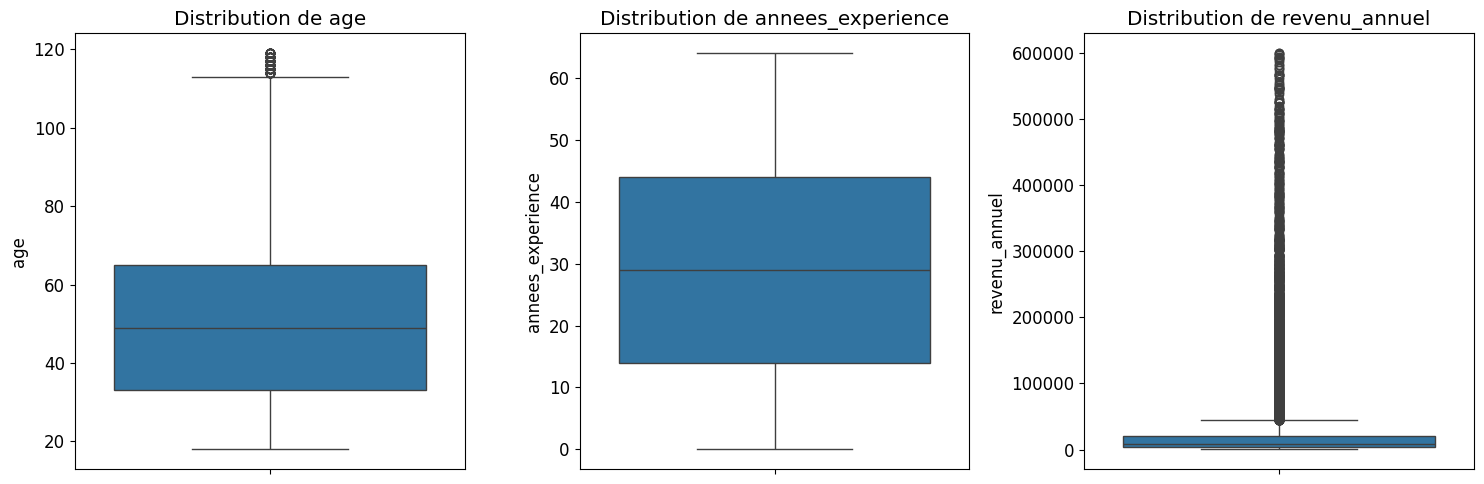

In [13]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Distribution de {feature}')
plt.tight_layout()
plt.show()

## 🔍 Justification de la méthode de traitement

<div style="background: linear-gradient(to right, #8e2de2, #4a00e0); padding: 2px; border-radius: 10px; margin-bottom: 20px;"> <div style="background: white; border-radius: 8px; padding: 15px;"> <h2 style="color: #8e2de2; text-align: center; margin-top: 0;">🔍 Justification du traitement des valeurs aberrantes</h2> </div> </div> <div style="background-color: #f5f0ff; padding: 25px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); border-left: 5px solid #8e2de2; margin-top: 20px;"> <div style="display: flex; align-items: center; margin-bottom: 20px;"> <div style="background-color: #8e2de2; width: 50px; height: 50px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 5px rgba(142, 45, 226, 0.3);"> <span style="color: white; font-size: 24px;">🌲</span> </div> <div> <h3 style="color: #8e2de2; margin: 0;">Méthode de l'<span style="background-color: #e9dcff; padding: 2px 6px; border-radius: 4px;">Isolation Forest</span></h3> <p style="margin: 5px 0 0 0; color: #666;">Pour détecter les valeurs aberrantes multivariées</p> </div> </div> <div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;"> <!-- Avantage 1 --> <div style="flex: 1; min-width: 250px; background-color: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border-top: 3px solid #8e2de2;"> <div style="display: flex; align-items: center; margin-bottom: 10px;"> <span style="color: #8e2de2; font-size: 20px; margin-right: 10px;">💪</span> <h4 style="color: #8e2de2; margin: 0;">Robustesse supérieure</h4> </div> <p style="margin: 0; padding-left: 30px;">Cette méthode est <strong>plus robuste</strong> que les approches traditionnelles basées sur les quantiles.</p>
  <div style="margin-top: 15px; background-color: #f5f0ff; padding: 10px; border-radius: 5px; font-size: 13px;">
    <p style="margin: 0;"><em>Contrairement aux méthodes basées sur les écarts-types ou les quantiles, l'Isolation Forest n'est pas affecté par le masquage statistique.</em></p>
  </div>
</div>

<!-- Avantage 2 -->
<div style="flex: 1; min-width: 250px; background-color: white; padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); border-top: 3px solid #8e2de2;">
  <div style="display: flex; align-items: center; margin-bottom: 10px;">
    <span style="color: #8e2de2; font-size: 20px; margin-right: 10px;">🔗</span>
    <h4 style="color: #8e2de2; margin: 0;">Détection multivariée</h4>
  </div>
  <p style="margin: 0; padding-left: 30px;">Elle prend en compte les <strong>relations entre les variables</strong>, ce qui permet de détecter des <strong>anomalies complexes</strong>.</p>
  
  <div style="margin-top: 15px; background-color: #f5f0ff; padding: 10px; border-radius: 5px; font-size: 13px;">
    <p style="margin: 0;"><em>Identifie des points qui semblent normaux sur chaque dimension individuelle mais anormaux dans l'espace multidimensionnel.</em></p>
  </div>
</div>
</div> <!-- Comment ça fonctionne --> <div style="background-color: white; padding: 20px; border-radius: 8px; margin-top: 20px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);"> <h4 style="color: #8e2de2; margin-top: 0; display: flex; align-items: center;"> <span style="font-size: 20px; margin-right: 10px;">⚙️</span> Comment fonctionne l'Isolation Forest </h4>
<div style="display: flex; flex-wrap: wrap; gap: 15px; margin-top: 15px;">
  <div style="flex: 1; min-width: 200px;">
    <div style="background-color: #f5f0ff; padding: 10px; border-radius: 5px; height: 100%;">
      <p style="margin: 0;"><strong>1.</strong> Construit des arbres de décision qui isolent chaque observation</p>
    </div>
  </div>
  <div style="flex: 1; min-width: 200px;">
    <div style="background-color: #f5f0ff; padding: 10px; border-radius: 5px; height: 100%;">
      <p style="margin: 0;"><strong>2.</strong> Les valeurs aberrantes nécessitent moins de divisions pour être isolées</p>
    </div>
  </div>
  <div style="flex: 1; min-width: 200px;">
    <div style="background-color: #f5f0ff; padding: 10px; border-radius: 5px; height: 100%;">
      <p style="margin: 0;"><strong>3.</strong> Attribue un score d'anomalie basé sur la facilité d'isolation</p>
    </div>
  </div>
</div>

<div style="text-align: center; margin-top: 20px;">
  <div style="display: inline-block; background-color: #f5f0ff; padding: 8px 15px; border-radius: 20px; font-size: 14px;">
    <span style="color: #8e2de2;">Paramètre clé: <strong>contamination = 0.05</strong> (5% de valeurs aberrantes attendues)</span>
  </div>
</div>
</div> <!-- Avantages supplémentaires --> <div style="margin-top: 25px;"> <div style="display: flex; align-items: center;"> <div style="flex: 1; height: 1px; background-color: #8e2de2; opacity: 0.3;"></div> <div style="margin: 0 15px;"> <span style="color: #8e2de2; font-weight: bold;">AVANTAGES SUPPLÉMENTAIRES</span> </div> <div style="flex: 1; height: 1px; background-color: #8e2de2; opacity: 0.3;"></div> </div>
<div style="display: flex; flex-wrap: wrap; gap: 10px; margin-top: 15px;">
  <div style="flex: 1; min-width: 150px; background-color: white; padding: 10px; border-radius: 5px; text-align: center; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.1);">
    <span style="color: #8e2de2; font-weight: bold;">Efficacité</span>
    <p style="margin: 5px 0 0 0; font-size: 13px;">Complexité O(n log n)</p>
  </div>
  <div style="flex: 1; min-width: 150px; background-color: white; padding: 10px; border-radius: 5px; text-align: center; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.1);">
    <span style="color: #8e2de2; font-weight: bold;">Adaptabilité</span>
    <p style="margin: 5px 0 0 0; font-size: 13px;">Fonctionne avec différents types de données</p>
  </div>
  <div style="flex: 1; min-width: 150px; background-color: white; padding: 10px; border-radius: 5px; text-align: center; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.1);">
    <span style="color: #8e2de2; font-weight: bold;">Interprétabilité</span>
    <p style="margin: 5px 0 0 0; font-size: 13px;">Fournit des scores d'anomalie</p>
  </div>
</div>
</div> </div> <div style="background-color: #f8f9fa; border-left: 5px solid #5f6368; padding: 15px; border-radius: 5px; margin-top: 25px;"> <p style="margin: 0; font-style: italic; color: #5f6368;"> <strong>Application dans notre projet:</strong> L'Isolation Forest nous permet d'identifier les observations dont les caractéristiques socio-démographiques et économiques s'écartent significativement des tendances générales, sans être biaisé par les distributions asymétriques typiques des données de revenu. </p> </div>

### Détection des valeurs aberrantes avec Isolation Forest

In [15]:
features_for_outlier = ['age', 'annees_experience', 'revenu_annuel']
X = df[features_for_outlier].copy()

### Appliquer Isolation Forest

In [16]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)
df['outlier'] = outliers

### Compter les valeurs aberrantes

In [17]:
n_outliers = (outliers == -1).sum()
print(f"Nombre de valeurs aberrantes détectées: {n_outliers} ({n_outliers/len(df)*100:.2f}%)")

Nombre de valeurs aberrantes détectées: 2000 (5.00%)


### Visualiser les valeurs aberrantes

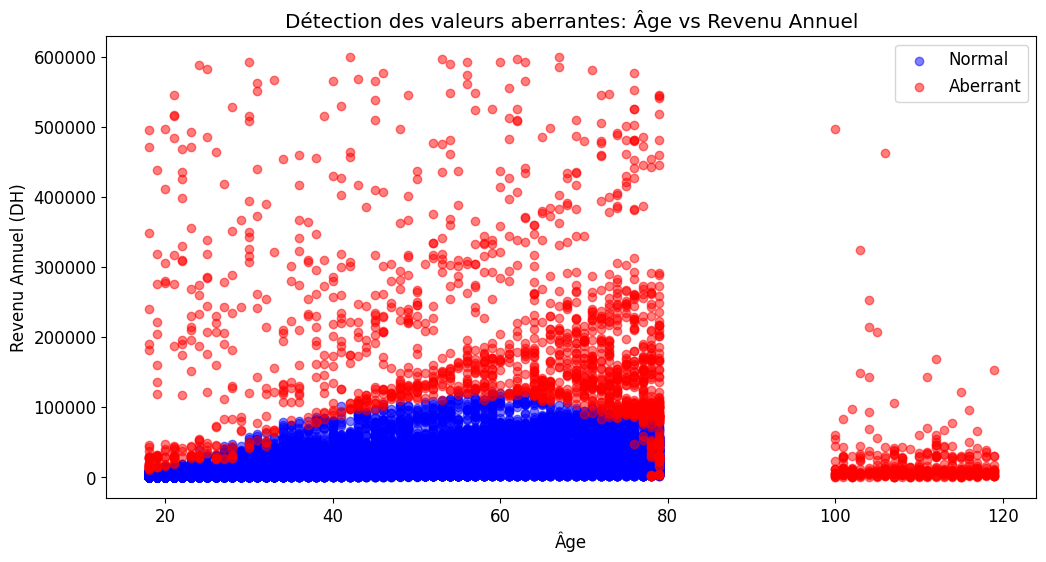

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(df[df['outlier'] == 1]['age'], df[df['outlier'] == 1]['revenu_annuel'], 
           alpha=0.5, label='Normal', color='blue')
plt.scatter(df[df['outlier'] == -1]['age'], df[df['outlier'] == -1]['revenu_annuel'], 
           alpha=0.5, label='Aberrant', color='red')
plt.title('Détection des valeurs aberrantes: Âge vs Revenu Annuel')
plt.xlabel('Âge')
plt.ylabel('Revenu Annuel (DH)')
plt.legend()
plt.show()

<div style="background: linear-gradient(to right, #ff7e5f, #feb47b); padding: 2px; border-radius: 10px; margin-bottom: 20px;"> <div style="background: white; border-radius: 8px; padding: 15px;"> <h2 style="color: #ff7e5f; text-align: center; margin-top: 0;">⚠️ Traitement des valeurs aberrantes</h2> </div> </div> <div style="position: relative; margin-top: 30px; margin-bottom: 40px;"> <!-- Ligne de processus --> <div style="position: absolute; top: 40px; left: 0; right: 0; height: 4px; background-color: #f0f0f0; z-index: 1;"></div> <!-- Étape 1: Détection --> <div style="position: relative; z-index: 2; width: 33%; float: left; text-align: center;"> <div style="width: 80px; height: 80px; border-radius: 50%; background: linear-gradient(135deg, #ff7e5f, #feb47b); margin: 0 auto; display: flex; justify-content: center; align-items: center; box-shadow: 0 4px 8px rgba(0,0,0,0.1);"> <span style="font-size: 30px; color: white;">🔍</span> </div> <h4 style="color: #ff7e5f; margin-top: 10px;">Détection</h4> <p style="font-size: 13px; color: #666; padding: 0 10px;">Isolation Forest</p> </div> <!-- Étape 2: Classification --> <div style="position: relative; z-index: 2; width: 33%; float: left; text-align: center;"> <div style="width: 80px; height: 80px; border-radius: 50%; background: linear-gradient(135deg, #ff7e5f, #feb47b); margin: 0 auto; display: flex; justify-content: center; align-items: center; box-shadow: 0 4px 8px rgba(0,0,0,0.1);"> <span style="font-size: 30px; color: white;">🔄</span> </div> <h4 style="color: #ff7e5f; margin-top: 10px;">Classification</h4> <p style="font-size: 13px; color: #666; padding: 0 10px;">Extrêmes vs Modérées</p> </div> <!-- Étape 3: Traitement --> <div style="position: relative; z-index: 2; width: 33%; float: left; text-align: center;"> <div style="width: 80px; height: 80px; border-radius: 50%; background: linear-gradient(135deg, #ff7e5f, #feb47b); margin: 0 auto; display: flex; justify-content: center; align-items: center; box-shadow: 0 4px 8px rgba(0,0,0,0.1);"> <span style="font-size: 30px; color: white;">✅</span> </div> <h4 style="color: #ff7e5f; margin-top: 10px;">Traitement</h4> <p style="font-size: 13px; color: #666; padding: 0 10px;">Suppression ou Pondération</p> </div> <div style="clear: both;"></div> </div> <div style="display: flex; flex-wrap: wrap; gap: 20px; margin-top: 30px;"> <!-- Approche 1: Suppression --> <div style="flex: 1; min-width: 300px; background-color: #fff5f2; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #ff7e5f;"> <div style="display: flex; align-items: center; margin-bottom: 15px;"> <div style="background-color: #ff7e5f; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(255, 126, 95, 0.3);"> <span style="color: white; font-size: 20px;">1</span> </div> <h3 style="color: #ff7e5f; margin: 0;">Suppression des valeurs extrêmes</h3> </div>
<div style="padding-left: 55px;">
  <p><strong>Suppression</strong> des valeurs aberrantes <span style="background-color: #ffebe5; padding: 2px 6px; border-radius: 4px; font-weight: bold;">extrêmes</span> pour éviter qu'elles ne faussent l'analyse.</p>
  
  <div style="background-color: #ffebe5; padding: 15px; border-radius: 5px; margin-top: 15px;">
    <div style="display: flex; align-items: center;">
      <span style="color: #ff7e5f; font-size: 24px; margin-right: 10px;">💡</span>
      <p style="margin: 0;"><strong>Critères de suppression:</strong></p>
    </div>
    <ul style="margin-top: 10px; margin-bottom: 0; padding-left: 35px;">
      <li>Âge > 100 ans</li>
      <li>Revenu annuel > 1 000 000 DH</li>
      <li>Autres critères métier spécifiques</li>
    </ul>
  </div>
  
  <div style="display: flex; align-items: center; margin-top: 20px;">
    <div style="width: 24px; height:

### Supprimer les valeurs aberrantes extrêmes

In [19]:
extreme_outliers = (df['age'] > 100) | (df['revenu_annuel'] > 1000000)
n_extreme = extreme_outliers.sum()

if n_extreme > 0:
    print(f"Suppression de {n_extreme} valeurs aberrantes extrêmes")
    df = df[~extreme_outliers]
else:
    print("Aucune valeur aberrante extrême détectée")

Suppression de 383 valeurs aberrantes extrêmes


### **Pour les autres valeurs aberrantes, nous les conservons mais nous les marquerons**
### **pour leur donner un poids réduit lors de la modélisation**

In [20]:
df['weight'] = 1.0
df.loc[df['outlier'] == -1, 'weight'] = 0.5
print(f"Attribution d'un poids réduit (0.5) à {(df['outlier'] == -1).sum()} valeurs aberrantes modérées")

Attribution d'un poids réduit (0.5) à 1617 valeurs aberrantes modérées


### Statistiques après traitement

In [21]:
print("\nStatistiques descriptives après traitement des valeurs aberrantes:")
print(df[numeric_features].describe())


Statistiques descriptives après traitement des valeurs aberrantes:
                age  annees_experience  revenu_annuel
count  39617.000000       39617.000000   39617.000000
mean      48.520383          29.062700   21766.168362
std       17.922183          17.508697   45170.514828
min       18.000000           0.000000     318.000000
25%       33.000000          14.000000    4081.000000
50%       48.000000          29.000000    8969.000000
75%       64.000000          44.000000   20502.000000
max      100.000000          64.000000  599614.000000


## 2.5 Résumé du nettoyage

<div style="background: linear-gradient(to right, #4facfe, #00f2fe); padding: 2px; border-radius: 10px; margin-bottom: 20px;"> <div style="background: white; border-radius: 8px; padding: 15px;"> <h2 style="color: #4facfe; text-align: center; margin-top: 0;">📊 Résumé du nettoyage des données</h2> </div> </div> <div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 30px 0;"> <!-- Carte 1: Doublons supprimés --> <div style="flex: 1; min-width: 200px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-top: 5px solid #4facfe;"> <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 15px;"> <h3 style="color: #4facfe; margin: 0; font-size: 18px;">Doublons supprimés</h3> <div style="background-color: #4facfe; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; box-shadow: 0 2px 4px rgba(79, 172, 254, 0.3);"> <span style="color: white; font-size: 20px;">👥</span> </div> </div>
<div style="text-align: center; margin: 20px 0;">
  <span style="font-size: 36px; font-weight: bold; color: #4facfe; font-family: 'Arial', sans-serif;">n_duplicates</span>
  <p style="margin: 5px 0 0 0; color: #666; font-size: 14px;">enregistrements dupliqués</p>
</div>

<div style="background-color: rgba(79, 172, 254, 0.1); padding: 10px; border-radius: 5px; font-size: 13px; text-align: center;">
  <p style="margin: 0;"><span style="color: #4facfe; font-weight: bold;">Impact:</span> Amélioration de la qualité des données et réduction du biais d'échantillonnage</p>
</div>
</div> <!-- Carte 2: Valeurs manquantes traitées --> <div style="flex: 1; min-width: 200px; background-color: #f0fff4; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-top: 5px solid #00c853;"> <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 15px;"> <h3 style="color: #00c853; margin: 0; font-size: 18px;">Valeurs manquantes traitées</h3> <div style="background-color: #00c853; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; box-shadow: 0 2px 4px rgba(0, 200, 83, 0.3);"> <span style="color: white; font-size: 20px;">🔍</span> </div> </div>
<div style="text-align: center; margin: 20px 0;">
  <span style="font-size: 36px; font-weight: bold; color: #00c853; font-family: 'Arial', sans-serif;">missing_df['Valeurs manquantes'].sum()</span>
  <p style="margin: 5px 0 0 0; color: #666; font-size: 14px;">cellules complétées</p>
</div>

<div style="background-color: rgba(0, 200, 83, 0.1); padding: 10px; border-radius: 5px; font-size: 13px; text-align: center;">
  <p style="margin: 0;"><span style="color: #00c853; font-weight: bold;">Méthode:</span> Médiane pour variables numériques, Mode pour variables catégorielles</p>
</div>
</div> </div> <div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 20px 0;"> <!-- Carte 3: Valeurs aberrantes --> <div style="flex: 1; min-width: 200px; background-color: #fff8e1; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-top: 5px solid #ffc107;"> <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 15px;"> <h3 style="color: #ffc107; margin: 0; font-size: 18px;">Valeurs aberrantes traitées</h3> <div style="background-color: #ffc107; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; box-shadow: 0 2px 4px rgba(255, 193, 7, 0.3);"> <span style="color: white; font-size: 20px;">⚠️</span> </div> </div>
<div style="display: flex; flex-wrap: wrap; gap: 15px; margin: 20px 0;">
  <div style="flex: 1; min-width: 120px; background-color: rgba(255, 193, 7, 0.1); padding: 15px; border-radius: 8px; text-align: center;">
    <span style="font-size: 24px; font-weight: bold; color: #ff7043; font-family: 'Arial', sans-serif;">n_extreme</span>
    <p style="margin: 5px 0 0 0; color: #666; font-size: 13px;">valeurs extrêmes supprimées</p>
  </div>
  
  <div style="flex: 1; min-width: 120px; background-color: rgba(255, 193, 7, 0.1); padding: 15px; border-radius: 8px; text-align: center;">
    <span style="font-size: 24px; font-weight: bold; color: #ff9800; font-family: 'Arial', sans-serif;">(df['outlier'] == -1).sum()</span>
    <p style="margin: 5px 0 0 0; color: #666; font-size: 13px;">valeurs modérées pondérées</p>
  </div>
</div>

<div style="background-color: rgba(255, 193, 7, 0.1); padding: 10px; border-radius: 5px; font-size: 13px; text-align: center; margin-top: 10px;">
  <p style="margin: 0;"><span style="color: #ffc107; font-weight: bold;">Méthode:</span> Isolation Forest pour détection multivariée</p>
</div>
</div> <!-- Carte 4: Dimensions finales --> <div style="flex: 1; min-width: 200px; background-color: #f3e5f5; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-top: 5px solid #9c27b0;"> <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 15px;"> <h3 style="color: #9c27b0; margin: 0; font-size: 18px;">Dimensions finales</h3> <div style="background-color: #9c27b0; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; box-shadow: 0 2px 4px rgba(156, 39, 176, 0.3);"> <span style="color: white; font-size: 20px;">📏</span> </div> </div>
<div style="text-align: center; margin: 20px 0;">
  <div style="display: flex; align-items: center; justify-content: center;">
    <span style="font-size: 36px; font-weight: bold; color: #9c27b0; font-family: 'Arial', sans-serif;">df.shape[0]</span>
    <span style="margin: 0 10px; color: #9c27b0; font-size: 24px;">×</span>
    <span style="font-size: 36px; font-weight: bold; color: #9c27b0; font-family: 'Arial', sans-serif;">df.shape[1]</span>
  </div>
  <p style="margin: 5px 0 0 0; color: #666; font-size: 14px;">lignes × colonnes</p>
</div>

<div style="background-color: rgba(156, 39, 176, 0.1); padding: 10px; border-radius: 5px; font-size: 13px; text-align: center;">
  <p style="margin: 0;"><span style="color: #9c27b0; font-weight: bold;">Résultat:</span> Dataset propre et prêt pour la modélisation</p>
</div>
</div> </div> <div style="background-color: #e3f2fd; border-radius: 10px; padding: 15px; margin-top: 30px; display: flex; align-items: center; border-left: 5px solid #2196f3;"> <div style="background-color: #2196f3; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;"> <span style="color: white; font-size: 20px;">💾</span> </div> <div> <p style="margin: 0; color: #2196f3; font-weight: bold;">Dataset nettoyé sauvegardé</p> <p style="margin: 5px 0 0 0; color: #666;">Le dataset final a été sauvegardé sous <code>dataset_revenu_marocains_nettoye.csv</code></p> </div> </div> <!-- Note: Remplacez les variables (n_duplicates, etc.) par les valeurs réelles de votre analyse -->


### Sauvegarde du dataset nettoyé

In [22]:
df.to_csv('dataset_revenu_marocains_nettoye.csv', index=False)
print("\nDataset nettoyé sauvegardé sous 'dataset_revenu_marocains_nettoye.csv'")


Dataset nettoyé sauvegardé sous 'dataset_revenu_marocains_nettoye.csv'


In [23]:
print(df.columns)


Index(['age', 'sexe', 'milieu', 'etat_matrimonial', 'region',
       'niveau_education', 'categorie_socioprofessionnelle', 'taille_foyer',
       'aide_sociale', 'a_acces_credit', 'a_retraite', 'possede_voiture',
       'possede_logement', 'possede_terrain', 'categorie_age',
       'annees_experience', 'revenu_annuel', 'age_en_mois', 'est_urbain',
       'est_marie', 'id_utilisateur', 'date_enregistrement', 'code_postal',
       'outlier', 'weight'],
      dtype='object')


# 3. **Transformation des données**

<div style="background: linear-gradient(to right, #ff6b6b, #ff8e8e); padding: 2px; border-radius: 10px; margin-bottom: 20px;"> <div style="background: white; border-radius: 8px; padding: 15px;"> <h2 style="color: #ff6b6b; text-align: center; margin-top: 0;">🗑️ Suppression des attributs non discriminants</h2> </div> </div> <div style="background-color: #fff5f5; padding: 20px; border-radius: 10px; margin-bottom: 20px; border-left: 5px solid #ff6b6b;"> <p style="margin-top: 0;">Certains attributs n'ont pas de valeur prédictive ou peuvent introduire du bruit dans le modèle. Leur suppression permet d'améliorer la performance et l'interprétabilité du modèle final.</p> </div> <div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;"> <!-- Attribut 1: id_utilisateur --> <div style="flex: 1; min-width: 300px; background-color: white; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); position: relative; overflow: hidden;"> <div style="position: absolute; top: 0; right: 0; background-color: #ff6b6b; color: white; padding: 5px 15px; border-bottom-left-radius: 10px; font-size: 12px; font-weight: bold;"> SUPPRIMÉ </div> <div style="display: flex; align-items: center; margin-bottom: 15px;"> <div style="background-color: #ff6b6b; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(255, 107, 107, 0.3);"> <span style="color: white; font-size: 20px;">🔑</span> </div> <div> <h3 style="color: #ff6b6b; margin: 0; font-family: monospace; font-size: 18px;">id_utilisateur</h3> <p style="margin: 5px 0 0 0; color: #666; font-size: 14px;">Identifiant unique</p> </div> </div> <div style="background-color: #fff5f5; padding: 15px; border-radius: 8px; margin-top: 15px;"> <div style="display: flex; align-items: flex-start;"> <span style="color: #ff6b6b; font-size: 20px; margin-right: 10px; margin-top: 2px;">❌</span> <p style="margin: 0;"><strong>Justification:</strong> Identifiant unique sans valeur prédictive. Ne contient aucune information utile pour la prédiction du revenu.</p> </div> </div> <div style="display: flex; align-items: center; margin-top: 15px; background-color: #f9f9f9; padding: 10px; border-radius: 8px;"> <span style="color: #666; font-size: 18px; margin-right: 10px;">💡</span> <p style="margin: 0; font-style: italic; color: #666; font-size: 14px;">Les identifiants uniques créent un risque de sur-apprentissage en permettant au modèle de "mémoriser" les exemples plutôt que de généraliser.</p> </div> </div> <!-- Attribut 2: date_enregistrement --> <div style="flex: 1; min-width: 300px; background-color: white; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); position: relative; overflow: hidden;"> <div style="position: absolute; top: 0; right: 0; background-color: #ff6b6b; color: white; padding: 5px 15px; border-bottom-left-radius: 10px; font-size: 12px; font-weight: bold;"> SUPPRIMÉ </div> <div style="display: flex; align-items: center; margin-bottom: 15px;"> <div style="background-color: #ff6b6b; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(255, 107, 107, 0.3);"> <span style="color: white; font-size: 20px;">📅</span> </div> <div> <h3 style="color: #ff6b6b; margin: 0; font-family: monospace; font-size: 18px;">date_enregistrement</h3> <p style="margin: 5px 0 0 0; color: #666; font-size: 14px;">Date d'enregistrement</p> </div> </div> <div style="background-color: #fff5f5; padding: 15px; border-radius: 8px; margin-top: 15px;"> <div style="display: flex; align-items: flex-start;"> <span style="color: #ff6b6b; font-size: 20px; margin-right: 10px; margin-top: 2px;">❌</span> <p style="margin: 0;"><strong>Justification:</strong> Information difficile à exploiter sans transformation. La date brute n'a pas d'impact direct sur le revenu.</p> </div> </div> <div style="display: flex; align-items: center; margin-top: 15px; background-color: #f9f9f9; padding: 10px; border-radius: 8px;"> <span style="color: #666; font-size: 18px; margin-right: 10px;">💡</span> <p style="margin: 0; font-style: italic; color: #666; font-size: 14px;">Pour exploiter cette information, il faudrait extraire des caractéristiques temporelles pertinentes (saison, mois, année, etc.).</p> </div> </div> </div> <div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;"> <!-- Attribut 3: code_postal --> <div style="flex: 1; min-width: 300px; background-color: white; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); position: relative; overflow: hidden;"> <div style="position: absolute; top: 0; right: 0; background-color: #ff6b6b; color: white; padding: 5px 15px; border-bottom-left-radius: 10px; font-size: 12px; font-weight: bold;"> SUPPRIMÉ </div> <div style="display: flex; align-items: center; margin-bottom: 15px;"> <div style="background-color: #ff6b6b; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(255, 107, 107, 0.3);"> <span style="color: white; font-size: 20px;">📍</span> </div> <div> <h3 style="color: #ff6b6b; margin: 0; font-family: monospace; font-size: 18px;">code_postal</h3> <p style="margin: 5px 0 0 0; color: #666; font-size: 14px;">Code postal</p> </div> </div> <div style="background-color: #fff5f5; padding: 15px; border-radius: 8px; margin-top: 15px;"> <div style="display: flex; align-items: flex-start;"> <span style="color: #ff6b6b; font-size: 20px; margin-right: 10px; margin-top: 2px;">❌</span> <p style="margin: 0;"><strong>Justification:</strong> Très spécifique, peut introduire du sur-apprentissage. La granularité est trop fine pour une généralisation efficace.</p> </div> </div> <div style="display: flex; align-items: center; margin-top: 15px; background-color: #f9f9f9; padding: 10px; border-radius: 8px;"> <span style="color: #666; font-size: 18px; margin-right: 10px;">💡</span> <p style="margin: 0; font-style: italic; color: #666; font-size: 14px;">La variable "région" est conservée car elle capture l'information géographique à un niveau plus approprié pour la modélisation.</p> </div> </div> <!-- Alternatives --> <div style="flex: 1; min-width: 300px; background-color: #f0f9ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); border-left: 5px solid #3498db;"> <div style="display: flex; align-items: center; margin-bottom: 15px;"> <div style="background-color: #3498db; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(52, 152, 219, 0.3);"> <span style="color: white; font-size: 20px;">💭</span> </div> <h3 style="color: #3498db; margin: 0;">Alternatives possibles</h3> </div> <p>Au lieu de supprimer complètement ces variables, on aurait pu envisager:</p> <ul style="padding-left: 20px; margin-top: 10px;"> <li style="margin-bottom: 10px;"> <strong style="color: #3498db;">Pour date_enregistrement:</strong> Extraire le mois, l'année, ou calculer l'ancienneté </li> <li style="margin-bottom: 10px;"> <strong style="color: #3498db;">Pour code_postal:</strong> Regrouper par zones géographiques plus larges ou créer des clusters </li> <li> <strong style="color: #3498db;">Pour id_utilisateur:</strong> Aucune transformation pertinente possible </li> </ul> <div style="background-color: #e1f5fe; padding: 10px; border-radius: 8px; margin-top: 15px;"> <p style="margin: 0; font-style: italic; color: #0277bd; font-size: 14px;">Ces transformations n'ont pas été retenues pour ce projet afin de privilégier la simplicité du modèle et éviter l'introduction de variables potentiellement non pertinentes.</p> </div> </div> </div> < </div> </div> </div>

In [25]:
df.drop(columns=['id_utilisateur', 'date_enregistrement', 'code_postal', 'age_en_mois', 'categorie_age'], inplace=True)

KeyError: "['id_utilisateur', 'date_enregistrement', 'code_postal', 'age_en_mois', 'categorie_age'] not found in axis"

In [ ]:
df.head()


<div style="background: linear-gradient(to right, #00b09b, #96c93d); padding: 2px; border-radius: 10px; margin-bottom: 20px;"> <div style="background: white; border-radius: 8px; padding: 15px;"> <h2 style="color: #00b09b; text-align: center; margin-top: 0;">✨ Création de nouveaux attributs prédictifs</h2> </div> </div> <div style="background-color: #f0fff4; padding: 20px; border-radius: 10px; margin-bottom: 20px; border-left: 5px solid #00b09b;"> <p style="margin-top: 0;">Créer de nouveaux attributs peut améliorer la qualité du modèle en fournissant des indicateurs plus représentatifs. Cette technique d'ingénierie de caractéristiques permet de capturer des relations complexes entre les variables existantes.</p> </div> <div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;"> <!-- Attribut créé: niveau_socioeco --> <div style="flex: 1; min-width: 300px; background-color: white; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); position: relative; overflow: hidden;"> <div style="position: absolute; top: 0; right: 0; background-color: #00b09b; color: white; padding: 5px 15px; border-bottom-left-radius: 10px; font-size: 12px; font-weight: bold;"> NOUVEL ATTRIBUT </div>
<div style="display: flex; align-items: center; margin-bottom: 15px;">
  <div style="background-color: #00b09b; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(0, 176, 155, 0.3);">
    <span style="color: white; font-size: 20px;">📊</span>
  </div>
  <div>
    <h3 style="color: #00b09b; margin: 0; font-family: monospace; font-size: 18px;">niveau_socioeco</h3>
    <p style="margin: 5px 0 0 0; color: #666; font-size: 14px;">Indicateur synthétique socio-économique</p>
  </div>
</div>

<div style="background-color: #f0fff4; padding: 15px; border-radius: 8px; margin-top: 15px;">
  <div style="display: flex; align-items: flex-start;">
    <span style="color: #00b09b; font-size: 20px; margin-right: 10px; margin-top: 2px;">✅</span>
    <p style="margin: 0;"><strong>Justification:</strong> Indicateur synthétique basé sur la possession de biens, permettant de capturer le niveau socio-économique global d'un ménage.</p>
  </div>
</div>

<div style="margin-top: 20px;">
  <h4 style="color: #00b09b; margin: 0 0 10px 0; font-size: 16px;">Méthode de calcul</h4>
  <div style="background-color: #f5f5f5; padding: 15px; border-radius: 8px; font-family: monospace; font-size: 14px; overflow-x: auto;">
    <pre style="margin: 0;">colonnes_possessions = ['possede_voiture', 'possede_logement', 'possede_terrain']
df['niveau_socioeco'] = df[colonnes_possessions].sum(axis=1)</pre> </div> </div>

<div style="margin-top: 20px;">
  <h4 style="color: #00b09b; margin: 0 0 10px 0; font-size: 16px;">Interprétation</h4>
  <div style="display: flex; flex-wrap: wrap; gap: 10px;">
    <div style="flex: 1; min-width: 100px; background-color: #f0fff4; padding: 10px; border-radius: 8px; text-align: center;">
      <span style="font-weight: bold; color: #00b09b;">0</span>
      <p style="margin: 5px 0 0 0; font-size: 12px; color: #666;">Aucun bien</p>
    </div>
    <div style="flex: 1; min-width: 100px; background-color: #f0fff4; padding: 10px; border-radius: 8px; text-align: center;">
      <span style="font-weight: bold; color: #00b09b;">1</span>
      <p style="margin: 5px 0 0 0; font-size: 12px; color: #666;">Un bien</p>
    </div>
    <div style="flex: 1; min-width: 100px; background-color: #f0fff4; padding: 10px; border-radius: 8px; text-align: center;">
      <span style="font-weight: bold; color: #00b09b;">2</span>
      <p style="margin: 5px 0 0 0; font-size: 12px; color: #666;">Deux biens</p>
    </div>
    <div style="flex: 1; min-width: 100px; background-color: #f0fff4; padding: 10px; border-radius: 8px; text-align: center;">
      <span style="font-weight: bold; color: #00b09b;">3</span>
      <p style="margin: 5px 0 0 0; font-size: 12px; color: #666;">Trois biens</p>
    </div>
  </div>
</div>


<div style="margin-top: 20px;">
  <h4 style="color: #3498db; margin: 0 0 10px 0; font-size: 16px;">Impact sur le modèle</h4>
  <div style="background-color: #e1f5fe; padding: 15px; border-radius: 8px;">
    <p style="margin: 0; font-style: italic; color: #0277bd;">L'ajout de l'attribut <code>niveau_socioeco</code> permet de capturer l'effet cumulatif de la possession de biens, qui est un indicateur plus puissant que chaque bien considéré individuellement.</p>
  </div>
</div>

<div style="margin-top: 20px;">
  <h4 style="color: #3498db; margin: 0 0 10px 0; font-size: 16px;">Autres attributs envisagés</h4>
  <div style="background-color: #f5f5f5; padding: 15px; border-radius: 8px;">
    <ul style="padding-left: 20px; margin: 0;">
      <li style="margin-bottom: 5px;">Ratio revenu/taille du foyer</li>
      <li style="margin-bottom: 5px;">Interaction âge × niveau d'éducation</li>
      <li>Catégorisation de l'expérience professionnelle</li>
    </ul>
  </div>
</div>
</div> </div> <div style="background-color: #f9f9f9; border-radius: 10px; padding: 20px; margin-top: 25px; border-left: 5px solid #607d8b;"> <div style="display: flex; align-items: flex-start;"> <span style="color: #607d8b; font-size: 24px; margin-right: 15px;">💡</span> <div> <h4 style="color: #607d8b; margin: 0;">Bonnes pratiques pour la création d'attributs</h4> <ul style="padding-left: 20px; margin-top: 10px;"> <li style="margin-bottom: 8px;">Créer des attributs basés sur une connaissance métier du domaine</li> <li style="margin-bottom: 8px;">Évaluer l'impact de chaque nouvel attribut sur la performance du modèle</li> <li style="margin-bottom: 8px;">Éviter la redondance et la multicolinéarité entre les attributs</li> <li>Documenter clairement la signification et le calcul de chaque nouvel attribut</li> </ul> </div> </div> </div> <div style="background-color: #e8f5e9; border-radius: 10px; padding: 15px; margin-top: 25px; display: flex; align-items: center; border-left: 5px solid #4caf50;"> <div style="background-color: #4caf50; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;"> <span style="color: white; font-size: 20px;">✓</span> </div> <div> <p style="margin: 0; color: #4caf50; font-weight: bold;">Attribut créé avec succès</p> <p style="margin: 5px 0 0 0; color: #666;">L'attribut <code>niveau_socioeco</code> a été ajouté au dataset et sera utilisé pour la modélisation.</p> </div> </div>

In [ ]:
# Sauvegarde du revenu annuel original pour les visualisations
revenu_original = df['revenu_annuel'].copy()

### 3.2.2 Niveau socio-économique basé sur les possessions


In [26]:
colonnes_possessions = ['possede_voiture', 'possede_logement', 'possede_terrain']
df['niveau_socioeco'] = df[colonnes_possessions].sum(axis=1)


## 3.3 Normalisation des valeurs numériques

**Justification :**  
Évite qu'une variable avec une grande échelle ne domine les autres. On applique une **standardisation** (centrage-réduction).



<div style="background: linear-gradient(to right, #6a11cb, #2575fc); padding: 2px; border-radius: 10px; margin-bottom: 20px;"> <div style="background: white; border-radius: 8px; padding: 15px;"> <h2 style="color: #6a11cb; text-align: center; margin-top: 0;">📏 Normalisation des variables positives</h2> </div> </div> <div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;"> <!-- Justification --> <div style="flex: 1; min-width: 300px; background-color: #f5f0ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #6a11cb;"> <div style="display: flex; align-items: center; margin-bottom: 15px;"> <div style="background-color: #6a11cb; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(106, 17, 203, 0.3);"> <span style="color: white; font-size: 20px;">💡</span> </div> <h3 style="color: #6a11cb; margin: 0;">Justification</h3> </div>
<p style="margin-top: 0;">Certaines variables comme <code style="background-color: #e9e1ff; padding: 2px 6px; border-radius: 4px; font-weight: bold;">taille_foyer</code> ne doivent pas contenir de valeurs négatives.</p>

<div style="background-color: #e9e1ff; padding: 15px; border-radius: 8px; margin-top: 15px;">
  <div style="display: flex; align-items: flex-start;">
    <span style="color: #6a11cb; font-size: 20px; margin-right: 10px; margin-top: 2px;">⚠️</span>
    <p style="margin: 0;">Une standardisation classique (z-score) pourrait produire des valeurs négatives, ce qui n'aurait pas de sens pour ces variables.</p>
  </div>
</div>
</div> <!-- Méthode --> <div style="flex: 1; min-width: 300px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #2575fc;"> <div style="display: flex; align-items: center; margin-bottom: 15px;"> <div style="background-color: #2575fc; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(37, 117, 252, 0.3);"> <span style="color: white; font-size: 20px;">🔄</span> </div> <h3 style="color: #2575fc; margin: 0;">Méthode appliquée</h3> </div>
<p style="margin-top: 0;">On applique donc une <strong style="color: #2575fc;">normalisation Min-Max</strong> pour transformer leurs valeurs entre 0 et 1, tout en conservant leur interprétabilité.</p>

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; margin-top: 15px; font-family: monospace; font-size: 14px;">
  <div style="text-align: center; margin-bottom: 10px; color: #2575fc; font-weight: bold;">Formule Min-Max</div>
  <div style="text-align: center; background-color: white; padding: 10px; border-radius: 5px;">
    X<sub>norm</sub> = (X - X<sub>min</sub>) / (X<sub>max</sub> - X<sub>min</sub>)
  </div>
</div>
</div> </div> <div style="background-color: #f0f0f0; border-radius: 10px; padding: 15px; margin-top: 25px; display: flex; align-items: center; border-left: 5px solid #616161;"> <div style="background-color: #616161; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;"> <span style="color: white; font-size: 20px;">✓</span> </div> <div> <p style="margin: 0; color: #616161; font-weight: bold;">Avantages de cette approche</p> <ul style="margin: 5px 0 0 0; padding-left: 20px; color: #616161;"> <li>Préserve la non-négativité des variables</li> <li>Maintient l'interprétabilité des données</li> <li>Facilite la convergence des algorithmes d'apprentissage</li> </ul> </div> </div>


## 3.4 Encodage des colonnes catégorielles¶
Justification :
Les modèles de machine learning nécessitent des données numériques. On utilise l’encodage One-Hot pour éviter un ordre arbitraire.

Remarque : drop_first=True permet d’éviter la multicolinéarité.


**Objectif** : Convertir les colonnes de type `object` (catégorielles) en variables numériques pour qu'elles soient exploitables par les algorithmes de machine learning.

**Méthode** : On utilise `pd.get_dummies` avec `drop_first=True` pour éviter la redondance (multicolinéarité).  
Ensuite, on calcule les nouvelles colonnes créées pour suivre l’impact de cet encodage.

Cette étape est essentielle pour transformer les données qualitatives en données quantitatives.


##  Aperçu final des données transformées

In [27]:
df.head()

,age,sexe,milieu,etat_matrimonial,region,niveau_education,categorie_socioprofessionnelle,taille_foyer,aide_sociale,a_acces_credit,...,possede_voiture,possede_logement,possede_terrain,annees_experience,revenu_annuel,est_urbain,est_marie,outlier,weight,niveau_socioeco
0,56,Femme,Urbain,Marié,Casablanca-Settat,Secondaire,Groupe 5,3.0,0,0,...,0.0,0.0,0,33.0,16343,1,1,1,1.0,0.0
1,69,Femme,Urbain,Marié,Casablanca-Settat,Fondamental,Groupe 4,2.0,0,0,...,0.0,1.0,1,51.0,15051,1,1,1,1.0,2.0
2,32,Homme,Urbain,Marié,L'Oriental,Secondaire,Groupe 5,9.0,0,0,...,1.0,1.0,0,11.0,5440,1,1,1,1.0,2.0
3,60,Femme,Urbain,Marié,Rabat-Salé-Kénitra,Fondamental,Groupe 4,8.0,0,1,...,0.0,1.0,0,42.0,15768,1,1,1,1.0,1.0
4,78,Femme,Urbain,Divorcé,Laâyoune-Sakia El Hamra,Fondamental,Groupe 3,7.0,0,0,...,1.0,0.0,0,62.0,28882,1,0,1,1.0,1.0


## Sauvegarde du dataset transformé

In [28]:
df.to_csv('dataset_revenu_marocains_transforme.csv', index=False, encoding='latin-1')
print("\nDataset transformé sauvegardé sous 'dataset_revenu_marocains_transforme.csv'")


Dataset transformé sauvegardé sous 'dataset_revenu_marocains_transforme.csv'


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39617 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             39617 non-null  int64  
 1   sexe                            39617 non-null  object 
 2   milieu                          39617 non-null  object 
 3   etat_matrimonial                39617 non-null  object 
 4   region                          39617 non-null  object 
 5   niveau_education                39617 non-null  object 
 6   categorie_socioprofessionnelle  39617 non-null  object 
 7   taille_foyer                    39617 non-null  float64
 8   aide_sociale                    39617 non-null  int64  
 9   a_acces_credit                  39617 non-null  int64  
 10  a_retraite                      39617 non-null  int64  
 11  possede_voiture                 39617 non-null  float64
 12  possede_logement                39617

In [30]:
df.head()

,age,sexe,milieu,etat_matrimonial,region,niveau_education,categorie_socioprofessionnelle,taille_foyer,aide_sociale,a_acces_credit,...,possede_voiture,possede_logement,possede_terrain,annees_experience,revenu_annuel,est_urbain,est_marie,outlier,weight,niveau_socioeco
0,56,Femme,Urbain,Marié,Casablanca-Settat,Secondaire,Groupe 5,3.0,0,0,...,0.0,0.0,0,33.0,16343,1,1,1,1.0,0.0
1,69,Femme,Urbain,Marié,Casablanca-Settat,Fondamental,Groupe 4,2.0,0,0,...,0.0,1.0,1,51.0,15051,1,1,1,1.0,2.0
2,32,Homme,Urbain,Marié,L'Oriental,Secondaire,Groupe 5,9.0,0,0,...,1.0,1.0,0,11.0,5440,1,1,1,1.0,2.0
3,60,Femme,Urbain,Marié,Rabat-Salé-Kénitra,Fondamental,Groupe 4,8.0,0,1,...,0.0,1.0,0,42.0,15768,1,1,1,1.0,1.0
4,78,Femme,Urbain,Divorcé,Laâyoune-Sakia El Hamra,Fondamental,Groupe 3,7.0,0,0,...,1.0,0.0,0,62.0,28882,1,0,1,1.0,1.0


# 4. Séparation des données

In [31]:
print("\n4. Séparation des données...")

target_col = 'revenu_annuel'
technical_col = ['outlier']
X = df.drop(columns=[target_col] + technical_col)
y = df[target_col]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Ensemble d'apprentissage: {X_train.shape[0]} échantillons")
print(f"Ensemble de test: {X_test.shape[0]} échantillons")



4. Séparation des données...
Ensemble d'apprentissage: 27731 échantillons
Ensemble de test: 11886 échantillons


# 5. Création et validation des modèles

In [32]:
print("\n5. Création et validation des modèles...")


5. Création et validation des modèles...


## 5.1 Définition des modèles à évaluer

<div style="background: linear-gradient(to right, #6a11cb, #2575fc); padding: 2px; border-radius: 10px; margin-bottom: 20px;">
  <div style="background: white; border-radius: 8px; padding: 15px;">
    <h2 style="color: #6a11cb; text-align: center; margin-top: 0;">🤖 Définition des Modèles à Évaluer</h2>
  </div>
</div>

<div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;">
  <!-- Justification -->
  <div style="flex: 1; min-width: 300px; background-color: #f5f0ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #6a11cb;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #6a11cb; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(106, 17, 203, 0.3);">
        <span style="color: white; font-size: 20px;">💡</span>
      </div>
      <h3 style="color: #6a11cb; margin: 0;">Approche multi-modèles</h3>
    </div>
    <p style="margin-top: 0;">L'utilisation de plusieurs algorithmes permet d'explorer différentes approches de modélisation et d'identifier celle qui capture le mieux les patterns dans nos données.</p>

<div style="background-color: #e9e1ff; padding: 15px; border-radius: 8px; margin-top: 15px;">
      <div style="display: flex; align-items: flex-start;">
        <span style="color: #6a11cb; font-size: 20px; margin-right: 10px; margin-top: 2px;">⚠️</span>
        <p style="margin: 0;">Chaque algorithme possède ses propres forces et faiblesses face à différents types de données et relations.</p>
      </div>
</div>
  </div>

  <!-- Méthode -->
  <div style="flex: 1; min-width: 300px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #2575fc;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #2575fc; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(37, 117, 252, 0.3);">
        <span style="color: white; font-size: 20px;">🔄</span>
      </div>
      <h3 style="color: #2575fc; margin: 0;">Modèles implémentés</h3>
    </div>
    <p style="margin-top: 0;">Nous avons sélectionné cinq algorithmes représentant différentes familles de modèles de régression:</p>

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; margin-top: 15px; font-family: monospace; font-size: 14px;">
      <div style="text-align: center; margin-bottom: 10px; color: #2575fc; font-weight: bold;">Modèles sélectionnés</div>
      <div style="background-color: white; padding: 10px; border-radius: 5px;">
        <ul style="margin: 0; padding-left: 20px;">
          <li><strong>Régression Linéaire</strong>: Modèle de base</li>
          <li><strong>Arbre de Décision</strong>: Capture les non-linéarités</li>
          <li><strong>Forêt Aléatoire</strong>: Ensemble d'arbres robuste</li>
          <li><strong>Gradient Boosting</strong>: Apprentissage séquentiel</li>
          <li><strong>Réseau de Neurones</strong>: Modélisation complexe</li>
        </ul>
      </div>
    </div>
  </div>
</div>

<div style="background-color: #f0f0f0; border-radius: 10px; padding: 15px; margin-top: 25px; display: flex; align-items: center; border-left: 5px solid #616161;">
  <div style="background-color: #616161; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;">
    <span style="color: white; font-size: 20px;">✓</span>
  </div>
  <div>
    <p style="margin: 0; color: #616161; font-weight: bold;">Avantages de cette approche</p>
    <ul style="margin: 5px 0 0 0; padding-left: 20px; color: #616161;">
      <li>Comparaison objective des performances</li>
      <li>Réduction du risque de biais de sélection</li>
      <li>Identification du meilleur compromis biais-variance</li>
    </ul>
  </div>
</div>

In [33]:
models = {
    'Régression Linéaire': LinearRegression(),
    'Arbre de Décision': DecisionTreeRegressor(random_state=42),
    'Forêt Aléatoire': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Réseau de Neurones': MLPRegressor(random_state=42, max_iter=300)
}

## 5.2 Définition des hyperparamètres à ajuster

<div style="background: linear-gradient(to right, #6a11cb, #2575fc); padding: 2px; border-radius: 10px; margin-bottom: 20px;">
  <div style="background: white; border-radius: 8px; padding: 15px;">
    <h2 style="color: #6a11cb; text-align: center; margin-top: 0;">⚙️ Optimisation des Hyperparamètres</h2>
  </div>
</div>

<div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;">
  <!-- Justification -->
  <div style="flex: 1; min-width: 300px; background-color: #f5f0ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #6a11cb;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #6a11cb; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(106, 17, 203, 0.3);">
        <span style="color: white; font-size: 20px;">💡</span>
      </div>
      <h3 style="color: #6a11cb; margin: 0;">Importance des hyperparamètres</h3>
    </div>
    <p style="margin-top: 0;">Les hyperparamètres sont des configurations qui contrôlent le comportement des algorithmes d'apprentissage et doivent être définis avant l'entraînement.</p>

<div style="background-color: #e9e1ff; padding: 15px; border-radius: 8px; margin-top: 15px;">
      <div style="display: flex; align-items: flex-start;">
        <span style="color: #6a11cb; font-size: 20px; margin-right: 10px; margin-top: 2px;">⚠️</span>
        <p style="margin: 0;">Un mauvais choix d'hyperparamètres peut conduire à un surapprentissage ou un sous-apprentissage, compromettant la performance du modèle.</p>
      </div>
    </div>
  </div>

  <!-- Méthode -->
  <div style="flex: 1; min-width: 300px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #2575fc;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #2575fc; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(37, 117, 252, 0.3);">
        <span style="color: white; font-size: 20px;">🔄</span>
      </div>
      <h3 style="color: #2575fc; margin: 0;">Méthode d'optimisation</h3>
    </div>
    <p style="margin-top: 0;">Nous utilisons <strong style="color: #2575fc;">GridSearchCV</strong> et <strong style="color: #2575fc;">RandomizedSearchCV</strong> pour explorer systématiquement l'espace des hyperparamètres.</p>

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; margin-top: 15px; font-family: monospace; font-size: 14px;">
      <div style="text-align: center; margin-bottom: 10px; color: #2575fc; font-weight: bold;">Hyperparamètres clés</div>
      <div style="background-color: white; padding: 10px; border-radius: 5px;">
        <ul style="margin: 0; padding-left: 20px;">
          <li><strong>Arbres</strong>: profondeur, échantillons min.</li>
          <li><strong>Forêts</strong>: nombre d'arbres, profondeur</li>
          <li><strong>Boosting</strong>: taux d'apprentissage, sous-échantillonnage</li>
          <li><strong>Réseaux</strong>: architecture, activation, régularisation</li>
        </ul>
      </div>
    </div>
  </div>
</div>

<div style="background-color: #f0f0f0; border-radius: 10px; padding: 15px; margin-top: 25px; display: flex; align-items: center; border-left: 5px solid #616161;">
  <div style="background-color: #616161; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;">
    <span style="color: white; font-size: 20px;">✓</span>
  </div>
  <div>
    <p style="margin: 0; color: #616161; font-weight: bold;">Bénéfices de l'optimisation</p>
    <ul style="margin: 5px 0 0 0; padding-left: 20px; color: #616161;">
      <li>Maximisation de la performance des modèles</li>
      <li>Meilleur compromis biais-variance</li>
      <li>Adaptation aux spécificités des données</li>
      <li>Réduction du risque de surapprentissage</li>
    </ul>
  </div>
</div>

In [34]:
param_grids = {
    'Régression Linéaire': {},
    
    'Arbre de Décision': {
        'regressor__criterion': ['squared_error'],
        'regressor__max_depth': [None, 5, 6, 7, 10],
        'regressor__min_samples_split': [2, 3, 4, 5, 10]
    },
    
    'Forêt Aléatoire': {
        'regressor__n_estimators': [50, 100],
        'regressor__criterion': ['squared_error'],
        'regressor__max_depth': [None, 10, 15]
    },
    
    'Gradient Boosting': {
        'regressor__loss': ['squared_error'],
        'regressor__learning_rate': [ 0.1, 0.2],
        'regressor__n_estimators': [100, 200],
        'regressor__subsample': [ 0.8, 1]
    },
    
    'Réseau de Neurones': {
        'regressor__hidden_layer_sizes': [ (100,), (100, 50), (100, 100)],
        'regressor__activation': ['relu'],
        'regressor__solver': ['adam'],
        'regressor__alpha': [0.0001, 0.001, 0.01],
        'regressor__learning_rate': [ 'adaptive'],
        'regressor__learning_rate_init': [0.001, 0.01],
        'regressor__max_iter': [200]

    }
}

## 5.3 Évaluation des modèles avec validation croisée

<div style="background: linear-gradient(to right, #6a11cb, #2575fc); padding: 2px; border-radius: 10px; margin-bottom: 20px;">
  <div style="background: white; border-radius: 8px; padding: 15px;">
    <h2 style="color: #6a11cb; text-align: center; margin-top: 0;">🔍 Prétraitement Intelligent des Données</h2>
  </div>
</div>

<div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;">
  <!-- Justification -->
  <div style="flex: 1; min-width: 300px; background-color: #f5f0ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #6a11cb;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #6a11cb; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(106, 17, 203, 0.3);">
        <span style="color: white; font-size: 20px;">💡</span>
      </div>
      <h3 style="color: #6a11cb; margin: 0;">Traitement différencié par type</h3>
    </div>
    <p style="margin-top: 0;">Chaque type de variable nécessite un traitement spécifique pour préserver sa nature et son information. Notre approche identifie automatiquement les types et applique les transformations appropriées.</p>

<div style="background-color: #e9e1ff; padding: 15px; border-radius: 8px; margin-top: 15px;">
      <div style="display: flex; align-items: flex-start;">
        <span style="color: #6a11cb; font-size: 20px; margin-right: 10px; margin-top: 2px;">⚠️</span>
        <p style="margin: 0;">Appliquer un encodage one-hot à des variables ordinales perdrait l'information d'ordre, tandis qu'un encodage ordinal sur des variables nominales créerait une fausse hiérarchie.</p>
      </div>
    </div>
  </div>

  <!-- Méthode -->
  <div style="flex: 1; min-width: 300px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #2575fc;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #2575fc; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(37, 117, 252, 0.3);">
        <span style="color: white; font-size: 20px;">🔄</span>
      </div>
      <h3 style="color: #2575fc; margin: 0;">Stratégie de transformation</h3>
    </div>
    <p style="margin-top: 0;">Notre code implémente trois pipelines de transformation distincts:</p>

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; margin-top: 15px; font-family: monospace; font-size: 14px;">
      <div style="text-align: center; margin-bottom: 10px; color: #2575fc; font-weight: bold;">Transformations par type</div>
      <div style="background-color: white; padding: 10px; border-radius: 5px;">
        <ol style="margin: 0; padding-left: 20px;">
          <li><strong>Variables numériques</strong>: Imputation médiane + standardisation</li>
          <li><strong>Variables ordinales</strong>: Imputation mode + encodage ordinal avec ordre spécifié</li>
          <li><strong>Variables nominales</strong>: Imputation mode + encodage one-hot</li>
        </ol>
      </div>
    </div>
  </div>
</div>

<div style="background-color: #f0f0f0; border-radius: 10px; padding: 15px; margin-top: 25px; display: flex; align-items: center; border-left: 5px solid #616161;">
  <div style="background-color: #616161; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;">
    <span style="color: white; font-size: 20px;">✓</span>
  </div>
  <div>
    <p style="margin: 0; color: #616161; font-weight: bold;">Détails d'implémentation clés</p>
    <ul style="margin: 5px 0 0 0; padding-left: 20px; color: #616161;">
      <li><strong>Détection automatique</strong> des types de variables</li>
      <li><strong>Ordre explicite</strong> pour les variables éducation et catégorie socioprofessionnelle</li>
      <li><strong>Gestion des valeurs inconnues</strong> avec handle_unknown='ignore'</li>
      <li><strong>ColumnTransformer</strong> pour assembler tous les transformers en un seul objet</li>
    </ul>
  </div>
</div>

In [35]:
print(X_train.columns.tolist())

['age', 'sexe', 'milieu', 'etat_matrimonial', 'region', 'niveau_education', 'categorie_socioprofessionnelle', 'taille_foyer', 'aide_sociale', 'a_acces_credit', 'a_retraite', 'possede_voiture', 'possede_logement', 'possede_terrain', 'annees_experience', 'est_urbain', 'est_marie', 'weight', 'niveau_socioeco']


In [36]:
from sklearn.preprocessing import OrdinalEncoder
# Identifier les types de colonnes
print("Analyse des types de colonnes dans X_train...")
numeric_cols = []
categorical_cols = []

for col in X_train.columns:
    # Afficher le type de chaque colonne pour le débogage
    print(f"Colonne '{col}' - Type: {X_train[col].dtype}")
    
    # Vérifier si la colonne contient des valeurs non numériques
    if X_train[col].dtype == 'object' or (
        hasattr(X_train[col], 'dtype') and 
        (pd.api.types.is_categorical_dtype(X_train[col]) or 
         X_train[col].dtype.name == 'category')
    ):
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)

print(f"\nColonnes numériques ({len(numeric_cols)}): {numeric_cols[:5]}...")
print(f"Colonnes catégorielles ({len(categorical_cols)}): {categorical_cols}")

# Identifier les variables catégorielles ordinales et nominales
ordinal_cols = [col for col in categorical_cols if col in ['niveau_education', 'categorie_socioprofessionnelle']]
nominal_cols = [col for col in categorical_cols if col not in ordinal_cols]

# Définir l'ordre des catégories
education_categories = ['Sans niveau', 'Fondamental', 'Secondaire', 'Supérieur']
socio_categories = ['Groupe 6', 'Groupe 5', 'Groupe 4', 'Groupe 3', 'Groupe 2', 'Groupe 1']

# Créer les transformers appropriés
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformer pour les variables ordinales
if ordinal_cols:
    ordinal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=[education_categories, socio_categories]))
    ])

# Transformer pour les variables nominales
if nominal_cols:
    nominal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

# Créer le preprocessor avec les transformers appropriés
transformers = [('num', numeric_transformer, numeric_cols)]
if ordinal_cols:
    transformers.append(('ord', ordinal_transformer, ordinal_cols))
if nominal_cols:
    transformers.append(('nom', nominal_transformer, nominal_cols))

preprocessor = ColumnTransformer(transformers=transformers)

print("\nPipeline de prétraitement créé avec succès.")


Analyse des types de colonnes dans X_train...
Colonne 'age' - Type: int64
Colonne 'sexe' - Type: object
Colonne 'milieu' - Type: object
Colonne 'etat_matrimonial' - Type: object
Colonne 'region' - Type: object
Colonne 'niveau_education' - Type: object
Colonne 'categorie_socioprofessionnelle' - Type: object
Colonne 'taille_foyer' - Type: float64
Colonne 'aide_sociale' - Type: int64
Colonne 'a_acces_credit' - Type: int64
Colonne 'a_retraite' - Type: int64
Colonne 'possede_voiture' - Type: float64
Colonne 'possede_logement' - Type: float64
Colonne 'possede_terrain' - Type: int64
Colonne 'annees_experience' - Type: float64
Colonne 'est_urbain' - Type: int64
Colonne 'est_marie' - Type: int64
Colonne 'weight' - Type: float64
Colonne 'niveau_socioeco' - Type: float64

Colonnes numériques (13): ['age', 'taille_foyer', 'aide_sociale', 'a_acces_credit', 'a_retraite']...
Colonnes catégorielles (6): ['sexe', 'milieu', 'etat_matrimonial', 'region', 'niveau_education', 'categorie_socioprofessionnell

In [37]:
results = {}
best_models = {}
import time

<div style="background-color: #f0f7ff; border-radius: 10px; border-left: 5px solid #2575fc; padding: 15px; margin: 20px 0;">
  <h3 style="color: #2575fc; margin-top: 0;">📈 Régression Linéaire</h3>
  <p style="margin-bottom: 0;">
    La régression linéaire cherche à minimiser la somme des carrés des résidus entre les valeurs prédites et réelles. Notre processus d'entraînement standardise d'abord les variables numériques et encode les variables catégorielles, puis sélectionne les 15 caractéristiques les plus pertinentes via <code>SelectKBest</code>. Le modèle final établit une équation linéaire où chaque coefficient représente l'impact d'une variable sur le revenu. Sa simplicité permet une interprétation directe des relations entre les variables et le revenu, tout en servant de référence pour évaluer les modèles plus complexes.
  </p>
</div>

In [38]:
# ===== Régression Linéaire =====
name = 'Régression Linéaire'
model = models[name]
print(f"\nAjustement des hyperparamètres pour {name}...")
start_time = time.time()

# Création du pipeline complet avec sélection de caractéristiques
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_regression, k=15)),  # Sélectionne les 15 meilleures caractéristiques
    ('regressor', model)
])

# Pour la régression linéaire (pas d'hyperparamètres)
best_pipeline = pipeline
best_pipeline.fit(X_train, y_train)

# Évaluation sur l'ensemble de validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(best_pipeline, X_train, y_train, cv=cv)
mae = mean_absolute_error(y_train, y_pred_cv)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_cv))
r2 = r2_score(y_train, y_pred_cv)

# Stockage des résultats
results[name] = {
    'MAE': mae,
    'RMSE': rmse,
    'R²': r2,
    'Time': time.time() - start_time
}
best_models[name] = best_pipeline

print(f"Performances de {name}:")
print(f"  MAE: {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²: {r2:.4f}")
print(f"  Temps d'exécution: {results[name]['Time']:.2f} secondes")


Ajustement des hyperparamètres pour Régression Linéaire...
Performances de Régression Linéaire:
  MAE: 10905.66
  RMSE: 28563.15
  R²: 0.6060
  Temps d'exécution: 1.91 secondes


<div style="background-color: #fff0f7; border-radius: 10px; border-left: 5px solid #fc2575; padding: 15px; margin: 20px 0;">
  <h3 style="color: #fc2575; margin-top: 0;">🌳 Arbre de Décision</h3>
  <p style="margin-bottom: 0;">
    L'arbre de décision divise récursivement les données selon des règles binaires pour créer des segments homogènes. Notre processus optimise la profondeur maximale, le nombre minimal d'échantillons par feuille et la stratégie de division via <code>GridSearchCV</code>. Après prétraitement et sélection des caractéristiques, l'algorithme identifie automatiquement les seuils optimaux pour chaque variable. Ce modèle capture naturellement les relations non-linéaires et les interactions entre variables, produisant des règles de décision facilement interprétables sous forme d'arborescence. Sa capacité à modéliser des relations complexes sans transformation préalable en fait un outil puissant pour notre analyse.
  </p>
</div>

In [39]:
# ===== Arbre de Décision =====
name = 'Arbre de Décision'
model = models[name]
print(f"\nAjustement des hyperparamètres pour {name}...")
start_time = time.time()

# Création du pipeline complet avec sélection de caractéristiques
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_regression, k=15)),  # Sélectionne les 15 meilleures caractéristiques
    ('regressor', model)
])

# Si le modèle a des hyperparamètres à ajuster
if param_grids[name]:
    # Utiliser GridSearchCV pour les autres modèles
    search = GridSearchCV(
        pipeline, param_grids[name], 
        cv=5, scoring='neg_mean_squared_error', 
        n_jobs=-1,
        verbose=2 
    )
    
    # Entraînement du modèle
    search.fit(X_train, y_train)
    best_pipeline = search.best_estimator_
    best_params = search.best_params_
    print(f"Meilleurs paramètres: {best_params}")

# Évaluation sur l'ensemble de validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(best_pipeline, X_train, y_train, cv=cv)
mae = mean_absolute_error(y_train, y_pred_cv)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_cv))
r2 = r2_score(y_train, y_pred_cv)

# Stockage des résultats
results[name] = {
    'MAE': mae,
    'RMSE': rmse,
    'R²': r2,
    'Time': time.time() - start_time
}
best_models[name] = best_pipeline

print(f"Performances de {name}:")
print(f"  MAE: {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²: {r2:.4f}")
print(f"  Temps d'exécution: {results[name]['Time']:.2f} secondes")


Ajustement des hyperparamètres pour Arbre de Décision...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Meilleurs paramètres: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 10, 'regressor__min_samples_split': 10}
Performances de Arbre de Décision:
  MAE: 4252.14
  RMSE: 19664.59
  R²: 0.8133
  Temps d'exécution: 45.52 secondes


<div style="background-color: #f0fff7; border-radius: 10px; border-left: 5px solid #25fc75; padding: 15px; margin: 20px 0;">
  <h3 style="color: #25fc75; margin-top: 0;">🌲 Forêt Aléatoire</h3>
  <p style="margin-bottom: 0;">
    La forêt aléatoire combine plusieurs arbres de décision entraînés sur des sous-ensembles aléatoires de données et de caractéristiques. Notre processus optimise le nombre d'arbres, leur profondeur et le nombre de caractéristiques considérées à chaque division via <code>RandomizedSearchCV</code>. Cette approche d'ensemble réduit le risque de surapprentissage tout en conservant la capacité à capturer des relations complexes. Le modèle final agrège les prédictions de tous les arbres, produisant des estimations plus stables et robustes que celles d'un arbre unique. Cette méthode excelle particulièrement avec nos données socio-économiques hétérogènes, offrant un bon compromis entre précision et généralisation.
  </p>
</div>

In [40]:
# ===== Forêt Aléatoire =====
name = 'Forêt Aléatoire'
model = models[name]
print(f"\nAjustement des hyperparamètres pour {name}...")
start_time = time.time()

# Création du pipeline complet avec sélection de caractéristiques
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_regression, k=15)),  # Sélectionne les 15 meilleures caractéristiques
    ('regressor', model)
])

# Si le modèle a des hyperparamètres à ajuster
if param_grids[name]:
    # Utiliser GridSearchCV pour les autres modèles
    search = GridSearchCV(
        pipeline, param_grids[name], 
        cv=5, scoring='neg_mean_squared_error', 
        n_jobs=-1,
        verbose=2 
    )
    
    # Entraînement du modèle
    search.fit(X_train, y_train)
    best_pipeline = search.best_estimator_
    best_params = search.best_params_
    print(f"Meilleurs paramètres: {best_params}")

# Évaluation sur l'ensemble de validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(best_pipeline, X_train, y_train, cv=cv)
mae = mean_absolute_error(y_train, y_pred_cv)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_cv))
r2 = r2_score(y_train, y_pred_cv)

# Stockage des résultats
results[name] = {
    'MAE': mae,
    'RMSE': rmse,
    'R²': r2,
    'Time': time.time() - start_time
}
best_models[name] = best_pipeline

print(f"Performances de {name}:")
print(f"  MAE: {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²: {r2:.4f}")
print(f"  Temps d'exécution: {results[name]['Time']:.2f} secondes")


Ajustement des hyperparamètres pour Forêt Aléatoire...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Meilleurs paramètres: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 15, 'regressor__n_estimators': 100}
Performances de Forêt Aléatoire:
  MAE: 3579.55
  RMSE: 17230.05
  R²: 0.8566
  Temps d'exécution: 187.97 secondes


<div style="background-color: #fff7f0; border-radius: 10px; border-left: 5px solid #fc7525; padding: 15px; margin: 20px 0;">
  <h3 style="color: #fc7525; margin-top: 0;">🚀 Gradient Boosting</h3>
  <p style="margin-bottom: 0;">
    Le Gradient Boosting construit séquentiellement des arbres de décision, chacun corrigeant les erreurs du précédent. Notre processus optimise le taux d'apprentissage, la profondeur des arbres et le nombre d'estimateurs via <code>GridSearchCV</code>. Après prétraitement et sélection des caractéristiques, l'algorithme entraîne progressivement des modèles faibles qui, ensemble, forment un prédicteur puissant. Cette approche séquentielle permet de se concentrer sur les cas difficiles à prédire, améliorant progressivement la performance. Le Gradient Boosting excelle généralement dans les problèmes de régression complexes comme notre prédiction de revenu, offrant souvent le meilleur équilibre entre biais et variance parmi nos modèles.
  </p>
</div>

In [41]:
# ===== Gradient Boosting =====
name = 'Gradient Boosting'
model = models[name]
print(f"\nAjustement des hyperparamètres pour {name}...")
start_time = time.time()

# Création du pipeline complet avec sélection de caractéristiques
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_regression, k=15)),  # Sélectionne les 15 meilleures caractéristiques
    ('regressor', model)
])

# Si le modèle a des hyperparamètres à ajuster
if param_grids[name]:
    # Utiliser RandomizedSearchCV pour les modèles avec beaucoup d'hyperparamètres
    search = RandomizedSearchCV(
        pipeline, param_grids[name], n_iter=10, 
        cv=5, scoring='neg_mean_squared_error', 
        random_state=42, n_jobs=-1,
        verbose=2
    )
    
    # Entraînement du modèle
    search.fit(X_train, y_train)
    best_pipeline = search.best_estimator_
    best_params = search.best_params_
    print(f"Meilleurs paramètres: {best_params}")

# Évaluation sur l'ensemble de validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(best_pipeline, X_train, y_train, cv=cv)
mae = mean_absolute_error(y_train, y_pred_cv)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_cv))
r2 = r2_score(y_train, y_pred_cv)

# Stockage des résultats
results[name] = {
    'MAE': mae,
    'RMSE': rmse,
    'R²': r2,
    'Time': time.time() - start_time
}
best_models[name] = best_pipeline

print(f"Performances de {name}:")
print(f"  MAE: {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²: {r2:.4f}")
print(f"  Temps d'exécution: {results[name]['Time']:.2f} secondes")


Ajustement des hyperparamètres pour Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleurs paramètres: {'regressor__subsample': 0.8, 'regressor__n_estimators': 200, 'regressor__loss': 'squared_error', 'regressor__learning_rate': 0.2}
Performances de Gradient Boosting:
  MAE: 5352.57
  RMSE: 18970.86
  R²: 0.8262
  Temps d'exécution: 117.97 secondes


<div style="background-color: #f7f0ff; border-radius: 10px; border-left: 5px solid #7525fc; padding: 15px; margin: 20px 0;">
  <h3 style="color: #7525fc; margin-top: 0;">🧠 Réseau de Neurones</h3>
  <p style="margin-bottom: 0;">
    Le réseau de neurones MLP modélise des relations hautement non-linéaires via des couches de neurones interconnectés. Notre processus optimise l'architecture du réseau (nombre de couches et de neurones), les fonctions d'activation et les paramètres de régularisation via <code>RandomizedSearchCV</code>. Après standardisation des données et sélection des caractéristiques, l'algorithme ajuste les poids synaptiques par rétropropagation du gradient d'erreur. Ce modèle peut capturer des patterns complexes et subtils dans nos données socio-économiques, mais nécessite davantage de données pour généraliser efficacement. Avec un maximum de 300 itérations, nous équilibrons la convergence et le temps de calcul pour obtenir un modèle performant sans surapprentissage excessif.
  </p>
</div>

In [42]:
# ===== Réseau de Neurones =====
name = 'Réseau de Neurones'
model = models[name]
print(f"\nAjustement des hyperparamètres pour {name}...")
start_time = time.time()

# Création du pipeline complet avec sélection de caractéristiques
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_regression, k=15)),  # Sélectionne les 15 meilleures caractéristiques
    ('regressor', model)
])

# Si le modèle a des hyperparamètres à ajuster
if param_grids[name]:
    # Utiliser RandomizedSearchCV pour les modèles avec beaucoup d'hyperparamètres
    search = RandomizedSearchCV(
        pipeline, param_grids[name], n_iter=10, 
        cv=5, scoring='neg_mean_squared_error', 
        random_state=42, n_jobs=-1,
        verbose=2
    )
    
    # Entraînement du modèle
    search.fit(X_train, y_train)
    best_pipeline = search.best_estimator_
    best_params = search.best_params_
    print(f"Meilleurs paramètres: {best_params}")

# Évaluation sur l'ensemble de validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(best_pipeline, X_train, y_train, cv=cv)
mae = mean_absolute_error(y_train, y_pred_cv)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_cv))
r2 = r2_score(y_train, y_pred_cv)

# Stockage des résultats
results[name] = {
    'MAE': mae,
    'RMSE': rmse,
    'R²': r2,
    'Time': time.time() - start_time
}
best_models[name] = best_pipeline

print(f"Performances de {name}:")
print(f"  MAE: {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²: {r2:.4f}")
print(f"  Temps d'exécution: {results[name]['Time']:.2f} secondes")


Ajustement des hyperparamètres pour Réseau de Neurones...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'regressor__solver': 'adam', 'regressor__max_iter': 200, 'regressor__learning_rate_init': 0.01, 'regressor__learning_rate': 'adaptive', 'regressor__hidden_layer_sizes': (100,), 'regressor__alpha': 0.01, 'regressor__activation': 'relu'}
Performances de Réseau de Neurones:
  MAE: 8592.90
  RMSE: 26153.30
  R²: 0.6697
  Temps d'exécution: 792.69 secondes


<div style="background-color: #f0f7ff; border-radius: 10px; border-left: 5px solid #2575fc; padding: 15px; margin: 20px 0;">
  <h3 style="color: #2575fc; margin-top: 0;">🏆 Comparaison et Sélection du Meilleur Modèle</h3>
  <p style="margin-bottom: 0;">
    Notre processus de sélection du meilleur modèle repose sur une comparaison systématique des performances selon trois métriques complémentaires: MAE, RMSE et R². Nous appliquons une hiérarchie de critères en privilégiant d'abord le RMSE minimal (pour pénaliser les erreurs importantes), puis le MAE minimal (pour l'erreur moyenne absolue), et enfin le R² maximal (pour la variance expliquée). Cette approche multi-critères nous permet d'identifier objectivement le modèle offrant le meilleur compromis entre précision globale et robustesse face aux valeurs extrêmes. Le temps d'exécution est également mesuré pour évaluer l'efficacité computationnelle, un facteur important pour le déploiement. Cette méthodologie rigoureuse garantit la sélection du modèle le plus adapté à notre objectif de prédiction précise des revenus dans le contexte socio-économique marocain.
  </p>
</div>

In [43]:
# ===== Comparaison des modèles =====
print("\nComparaison finale des modèles:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R²: {metrics['R²']:.4f}")
    print(f"  Temps: {metrics['Time']:.2f}s")

# Convertir le dictionnaire en liste triable
model_scores = [
    (name, metrics["MAE"], metrics["RMSE"], metrics["R²"])
    for name, metrics in results.items()
]

# Trier selon RMSE croissant, puis MAE croissant, puis R² décroissant
model_scores_sorted = sorted(model_scores, key=lambda x: (x[2], x[1], -x[3]))

# Sélection du meilleur modèle
best_model_name = model_scores_sorted[0][0]
print(f"\n Le meilleur modèle est *{best_model_name}* selon la priorité : RMSE (min), puis MAE (min), puis R² (max).")
# ===== Comparaison des modèles =====
print("\nComparaison finale des modèles:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R²: {metrics['R²']:.4f}")
    print(f"  Temps: {metrics['Time']:.2f}s")

# Convertir le dictionnaire en liste triable
model_scores = [
    (name, metrics["MAE"], metrics["RMSE"], metrics["R²"])
    for name, metrics in results.items()
]

# Trier selon RMSE croissant, puis MAE croissant, puis R² décroissant
model_scores_sorted = sorted(model_scores, key=lambda x: (x[2], x[1], -x[3]))

# Sélection du meilleur modèle
best_model_name = model_scores_sorted[0][0]
print(f"\n Le meilleur modèle est *{best_model_name}* selon la priorité : RMSE (min), puis MAE (min), puis R² (max).")


Comparaison finale des modèles:

Régression Linéaire:
  MAE: 10905.66
  RMSE: 28563.15
  R²: 0.6060
  Temps: 1.91s

Arbre de Décision:
  MAE: 4252.14
  RMSE: 19664.59
  R²: 0.8133
  Temps: 45.52s

Forêt Aléatoire:
  MAE: 3579.55
  RMSE: 17230.05
  R²: 0.8566
  Temps: 187.97s

Gradient Boosting:
  MAE: 5352.57
  RMSE: 18970.86
  R²: 0.8262
  Temps: 117.97s

Réseau de Neurones:
  MAE: 8592.90
  RMSE: 26153.30
  R²: 0.6697
  Temps: 792.69s

 Le meilleur modèle est *Forêt Aléatoire* selon la priorité : RMSE (min), puis MAE (min), puis R² (max).

Comparaison finale des modèles:

Régression Linéaire:
  MAE: 10905.66
  RMSE: 28563.15
  R²: 0.6060
  Temps: 1.91s

Arbre de Décision:
  MAE: 4252.14
  RMSE: 19664.59
  R²: 0.8133
  Temps: 45.52s

Forêt Aléatoire:
  MAE: 3579.55
  RMSE: 17230.05
  R²: 0.8566
  Temps: 187.97s

Gradient Boosting:
  MAE: 5352.57
  RMSE: 18970.86
  R²: 0.8262
  Temps: 117.97s

Réseau de Neurones:
  MAE: 8592.90
  RMSE: 26153.30
  R²: 0.6697
  Temps: 792.69s

 Le meill

## 5.4 Comparaison des performances des modèles

<div style="background: linear-gradient(to right, #6a11cb, #2575fc); padding: 2px; border-radius: 10px; margin-bottom: 20px;">
  <div style="background: white; border-radius: 8px; padding: 15px;">
    <h2 style="color: #6a11cb; text-align: center; margin-top: 0;">📊 Évaluation des Modèles</h2>
  </div>
</div>

<div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;">
  <!-- Justification -->
  <div style="flex: 1; min-width: 300px; background-color: #f5f0ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #6a11cb;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #6a11cb; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(106, 17, 203, 0.3);">
        <span style="color: white; font-size: 20px;">💡</span>
      </div>
      <h3 style="color: #6a11cb; margin: 0;">Validation croisée</h3>
    </div>
    <p style="margin-top: 0;">La validation croisée à 5 plis divise les données d'entraînement en 5 parties, utilisant chacune comme ensemble de validation à tour de rôle.</p>

<div style="background-color: #e9e1ff; padding: 15px; border-radius: 8px; margin-top: 15px;">
      <div style="display: flex; align-items: flex-start;">
        <span style="color: #6a11cb; font-size: 20px; margin-right: 10px; margin-top: 2px;">⚠️</span>
        <p style="margin: 0;">Une évaluation sur un seul split train/test pourrait être biaisée par la composition spécifique de l'échantillon de validation.</p>
      </div>
    </div>
  </div>

  <!-- Méthode -->
  <div style="flex: 1; min-width: 300px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #2575fc;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #2575fc; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(37, 117, 252, 0.3);">
        <span style="color: white; font-size: 20px;">🔄</span>
      </div>
      <h3 style="color: #2575fc; margin: 0;">Métriques d'évaluation</h3>
    </div>
    <p style="margin-top: 0;">Nous utilisons trois métriques complémentaires pour évaluer les performances des modèles:</p>

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; margin-top: 15px; font-family: monospace; font-size: 14px;">
      <div style="text-align: center; margin-bottom: 10px; color: #2575fc; font-weight: bold;">Métriques utilisées</div>
      <div style="background-color: white; padding: 10px; border-radius: 5px;">
        <ul style="margin: 0; padding-left: 20px;">
          <li><strong>MAE</strong>: Erreur absolue moyenne (DH)</li>
          <li><strong>RMSE</strong>: Racine de l'erreur quadratique moyenne (DH)</li>
          <li><strong>R²</strong>: Coefficient de détermination (0-1)</li>
        </ul>
      </div>
    </div>
  </div>
</div>

<div style="background-color: #f0f0f0; border-radius: 10px; padding: 15px; margin-top: 25px; display: flex; align-items: center; border-left: 5px solid #616161;">
  <div style="background-color: #616161; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;">
    <span style="color: white; font-size: 20px;">✓</span>
  </div>
  <div>
    <p style="margin: 0; color: #616161; font-weight: bold;">Complémentarité des métriques</p>
    <ul style="margin: 5px 0 0 0; padding-left: 20px; color: #616161;">
      <li><strong>MAE</strong>: Robuste aux valeurs aberrantes, interprétable</li>
      <li><strong>RMSE</strong>: Pénalise davantage les erreurs importantes</li>
      <li><strong>R²</strong>: Indépendant de l'échelle, facilite la comparaison</li>
    </ul>
  </div>
</div>

In [44]:
print("\nComparaison des performances des modèles:")
results_df = pd.DataFrame(results).T
print(results_df)


Comparaison des performances des modèles:
                              MAE          RMSE        R²        Time
Régression Linéaire  10905.664238  28563.145541  0.606007    1.911389
Arbre de Décision     4252.140481  19664.590053  0.813256   45.515290
Forêt Aléatoire       3579.549616  17230.045325  0.856633  187.967246
Gradient Boosting     5352.571962  18970.857908  0.826200  117.968263
Réseau de Neurones    8592.903645  26153.295677  0.669684  792.691313


<Figure size 800x200 with 0 Axes>

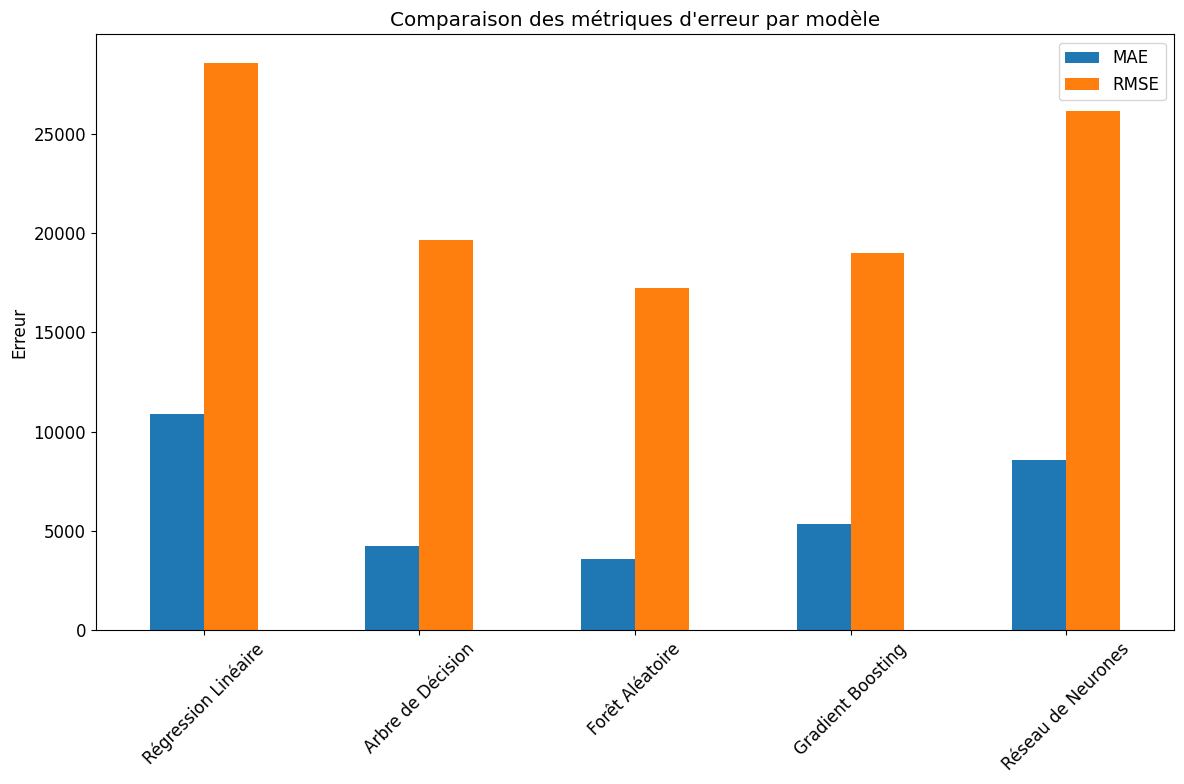

In [56]:
plt.figure(figsize=(8, 2))
results_df[['MAE', 'RMSE']].plot(kind='bar')
plt.title('Comparaison des métriques d\'erreur par modèle')
plt.ylabel('Erreur')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

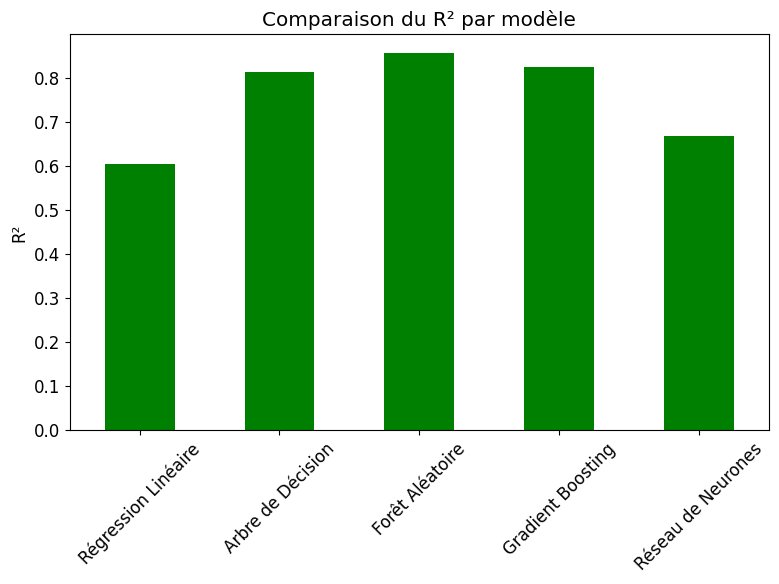

In [57]:
plt.figure(figsize=(8, 6))
results_df['R²'].plot(kind='bar', color='green')
plt.title('Comparaison du R² par modèle')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Identification du meilleur modèle

In [47]:
best_model_name = results_df['R²'].idxmax()
best_model = best_models[best_model_name]
print(f"\nMeilleur modèle: {best_model_name} avec R² = {results_df.loc[best_model_name, 'R²']:.4f}")


Meilleur modèle: Forêt Aléatoire avec R² = 0.8566


# 6. Test du modèle final

<div style="background: linear-gradient(to right, #6a11cb, #2575fc); padding: 2px; border-radius: 10px; margin-bottom: 20px;">
  <div style="background: white; border-radius: 8px; padding: 15px;">
    <h2 style="color: #6a11cb; text-align: center; margin-top: 0;">🏆 Test du Modèle Final</h2>
  </div>
</div>

<div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;">
  <!-- Justification -->
  <div style="flex: 1; min-width: 300px; background-color: #f5f0ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #6a11cb;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #6a11cb; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(106, 17, 203, 0.3);">
        <span style="color: white; font-size: 20px;">💡</span>
      </div>
      <h3 style="color: #6a11cb; margin: 0;">Importance de l'évaluation finale</h3>
    </div>
    <p style="margin-top: 0;">L'évaluation sur l'ensemble de test fournit une estimation non biaisée de la performance du modèle sur des données nouvelles.</p>

<div style="background-color: #e9e1ff; padding: 15px; border-radius: 8px; margin-top: 15px;">
      <div style="display: flex; align-items: flex-start;">
        <span style="color: #6a11cb; font-size: 20px; margin-right: 10px; margin-top: 2px;">⚠️</span>
        <p style="margin: 0;">Les données de test n'ont jamais été vues pendant l'entraînement ou l'optimisation des hyperparamètres, garantissant une évaluation objective.</p>
      </div>
    </div>
  </div>

  <!-- Méthode -->
  <div style="flex: 1; min-width: 300px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #2575fc;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #2575fc; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(37, 117, 252, 0.3);">
        <span style="color: white; font-size: 20px;">🔄</span>
      </div>
      <h3 style="color: #2575fc; margin: 0;">Analyse des résultats</h3>
    </div>
    <p style="margin-top: 0;">Nous évaluons le modèle final à travers:</p>

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; margin-top: 15px; font-family: monospace; font-size: 14px;">
      <div style="text-align: center; margin-bottom: 10px; color: #2575fc; font-weight: bold;">Éléments d'analyse</div>
      <div style="background-color: white; padding: 10px; border-radius: 5px;">
        <ol style="margin: 0; padding-left: 20px;">
          <li><strong>Métriques quantitatives</strong>: MAE, RMSE, R²</li>
          <li><strong>Visualisation prédictions/réalité</strong>: Dispersion</li>
          <li><strong>Analyse des résidus</strong>: Patterns et biais</li>
        </ol>
      </div>
    </div>
  </div>
</div>

<div style="background-color: #f0f0f0; border-radius: 10px; padding: 15px; margin-top: 25px; display: flex; align-items: center; border-left: 5px solid #616161;">
  <div style="background-color: #616161; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;">
    <span style="color: white; font-size: 20px;">✓</span>
  </div>
  <div>
    <p style="margin: 0; color: #616161; font-weight: bold;">Interprétation des visualisations</p>
    <ul style="margin: 5px 0 0 0; padding-left: 20px; color: #616161;">
      <li><strong>Graphique de dispersion</strong>: Points proches de la diagonale = prédictions précises</li>
      <li><strong>Résidus vs prédictions</strong>: Distribution aléatoire autour de zéro = modèle bien calibré</li>
      <li><strong>Patterns dans les résidus</strong>: Indiquent des relations non capturées</li>
    </ul>
  </div>
</div>

In [48]:
# Prédictions sur l'ensemble de test
y_pred_final = best_model.predict(X_test)

### Calcul des métriques finales

In [49]:
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)

# 7. Sauvegarde du modèle

In [50]:
print(f"Performances finales du modèle {best_model_name}:")
print(f"  MAE: {mae_final:.2f}")
print(f"  RMSE: {rmse_final:.2f}")
print(f"  R²: {r2_final:.4f}")

Performances finales du modèle Forêt Aléatoire:
  MAE: 3425.15
  RMSE: 16050.43
  R²: 0.8692


In [51]:
joblib.dump(best_model, 'modele_selection.joblib')
print("Modèle sauvegardé avec succès dans 'modele_selection.joblib'")

Modèle sauvegardé avec succès dans 'modele_selection.joblib'


## 8. Visualisation des prédictions vs valeurs réelles

<div style="background: linear-gradient(to right, #6a11cb, #2575fc); padding: 2px; border-radius: 10px; margin-bottom: 20px;">
  <div style="background: white; border-radius: 8px; padding: 15px;">
    <h2 style="color: #6a11cb; text-align: center; margin-top: 0;">📈 Visualisation et Interprétation</h2>
  </div>
</div>

<div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;">
  <!-- Justification -->
  <div style="flex: 1; min-width: 300px; background-color: #f5f0ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #6a11cb;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #6a11cb; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(106, 17, 203, 0.3);">
        <span style="color: white; font-size: 20px;">💡</span>
      </div>
      <h3 style="color: #6a11cb; margin: 0;">Importance des visualisations</h3>
    </div>
    <p style="margin-top: 0;">Les visualisations permettent de détecter des patterns que les métriques agrégées pourraient masquer.</p>

<div style="background-color: #e9e1ff; padding: 15px; border-radius: 8px; margin-top: 15px;">
      <div style="display: flex; align-items: flex-start;">
        <span style="color: #6a11cb; font-size: 20px; margin-right: 10px; margin-top: 2px;">⚠️</span>
        <p style="margin: 0;">Un modèle peut avoir de bonnes métriques globales tout en présentant des biais systématiques pour certaines tranches de données.</p>
      </div>
    </div>
  </div>

  <!-- Méthode -->
  <div style="flex: 1; min-width: 300px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #2575fc;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #2575fc; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(37, 117, 252, 0.3);">
        <span style="color: white; font-size: 20px;">🔄</span>
      </div>
      <h3 style="color: #2575fc; margin: 0;">Analyse des résidus</h3>
    </div>
    <p style="margin-top: 0;">L'analyse des résidus (différences entre valeurs réelles et prédites) révèle:</p>

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 8px; margin-top: 15px; font-family: monospace; font-size: 14px;">
      <div style="text-align: center; margin-bottom: 10px; color: #2575fc; font-weight: bold;">Patterns à rechercher</div>
      <div style="background-color: white; padding: 10px; border-radius: 5px;">
        <ul style="margin: 0; padding-left: 20px;">
          <li><strong>Biais systématiques</strong>: Résidus majoritairement positifs/négatifs</li>
          <li><strong>Hétéroscédasticité</strong>: Variance des résidus qui augmente</li>
          <li><strong>Non-linéarités</strong>: Patterns en forme de courbe</li>
        </ul>
      </div>
    </div>
  </div>
</div>

<div style="background-color: #f0f0f0; border-radius: 10px; padding: 15px; margin-top: 25px; display: flex; align-items: center; border-left: 5px solid #616161;">
  <div style="background-color: #616161; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;">
    <span style="color: white; font-size: 20px;">✓</span>
  </div>
  <div>
    <p style="margin: 0; color: #616161; font-weight: bold;">Interprétation idéale</p>
    <ul style="margin: 5px 0 0 0; padding-left: 20px; color: #616161;">
      <li>Points uniformément répartis autour de la diagonale dans le graphique de dispersion</li>
      <li>Résidus aléatoirement distribués autour de zéro sans pattern visible</li>
      <li>Variance des résidus constante quelle que soit la valeur prédite</li>
      <li>Absence de clusters ou de zones vides dans les graphiques</li>
    </ul>
  </div>
</div>

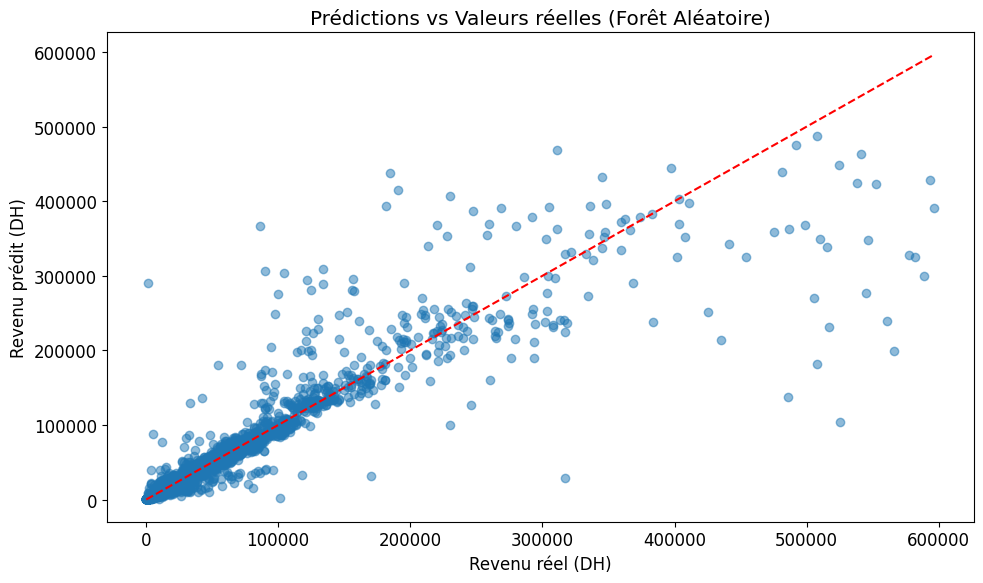

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Revenu réel (DH)')
plt.ylabel('Revenu prédit (DH)')
plt.title(f'Prédictions vs Valeurs réelles ({best_model_name})')
plt.tight_layout()
plt.show()

## 9. Analyse des résidus

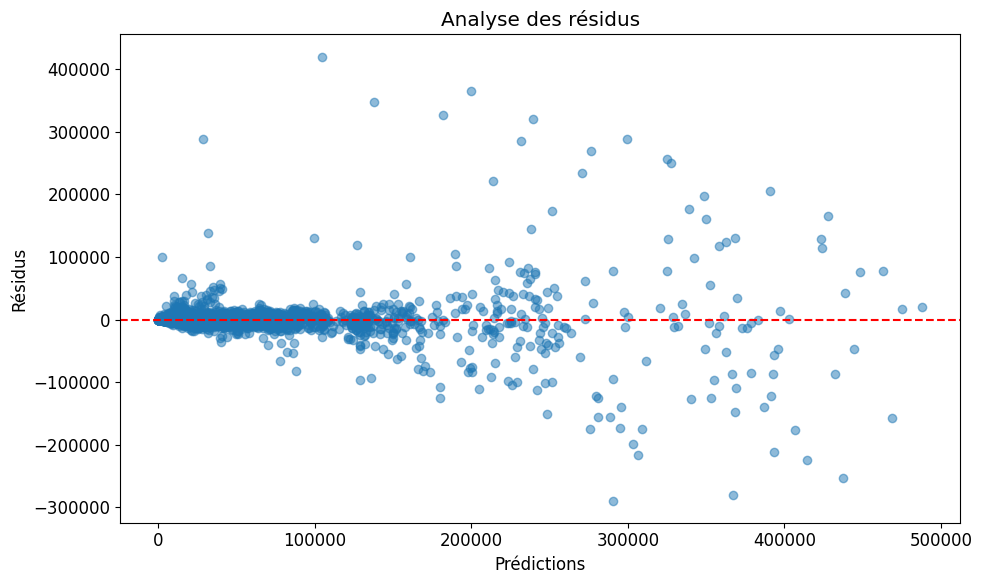

In [53]:
residus = y_test - y_pred_final
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_final, residus, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Analyse des résidus')
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(to right, #6a11cb, #2575fc); padding: 2px; border-radius: 10px; margin-bottom: 20px;">
  <div style="background: white; border-radius: 8px; padding: 15px;">
    <h2 style="color: #6a11cb; text-align: center; margin-top: 0;">🎯 Conclusion et Perspectives</h2>
  </div>
</div>

<div style="display: flex; flex-wrap: wrap; gap: 20px; margin: 25px 0;">
  <!-- Points forts -->
  <div style="flex: 1; min-width: 300px; background-color: #f5f0ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #6a11cb;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #6a11cb; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(106, 17, 203, 0.3);">
        <span style="color: white; font-size: 20px;">💪</span>
      </div>
      <h3 style="color: #6a11cb; margin: 0;">Points forts de notre approche</h3>
    </div>
    <ul style="margin-top: 10px; padding-left: 20px;">
      <li><strong>Méthodologie rigoureuse</strong>: Du nettoyage à l'évaluation finale</li>
      <li><strong>Prétraitement adapté</strong>: Traitement spécifique par type de variable</li>
      <li><strong>Comparaison multi-modèles</strong>: Identification du meilleur algorithme</li>
      <li><strong>Optimisation systématique</strong>: Recherche exhaustive des hyperparamètres</li>
      <li><strong>Évaluation robuste</strong>: Validation croisée et ensemble de test séparé</li>
    </ul>
  </div>

  <!-- Améliorations -->
  <div style="flex: 1; min-width: 300px; background-color: #f0f7ff; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); border-left: 5px solid #2575fc;">
    <div style="display: flex; align-items: center; margin-bottom: 15px;">
      <div style="background-color: #2575fc; width: 40px; height: 40px; border-radius: 8px; display: flex; justify-content: center; align-items: center; margin-right: 15px; box-shadow: 0 2px 4px rgba(37, 117, 252, 0.3);">
        <span style="color: white; font-size: 20px;">🚀</span>
      </div>
      <h3 style="color: #2575fc; margin: 0;">Améliorations possibles</h3>
    </div>
    <ul style="margin-top: 10px; padding-left: 20px;">
      <li><strong>Transformation logarithmique</strong>: Pour normaliser la distribution du revenu</li>
      <li><strong>Features d'interaction</strong>: Capturer les effets combinés des variables</li>
      <li><strong>Modèles avancés</strong>: Explorer XGBoost ou LightGBM</li>
      <li><strong>Analyse par segments</strong>: Modèles spécifiques par sous-population</li>
      <li><strong>Interprétabilité</strong>: Techniques SHAP pour expliquer les prédictions</li>
    </ul>
  </div>
</div>

<div style="background-color: #f0f0f0; border-radius: 10px; padding: 15px; margin-top: 25px; display: flex; align-items: center; border-left: 5px solid #616161;">
  <div style="background-color: #616161; width: 40px; height: 40px; border-radius: 50%; display: flex; justify-content: center; align-items: center; margin-right: 15px;">
    <span style="color: white; font-size: 20px;">🌍</span>
  </div>
  <div>
    <p style="margin: 0; color: #616161; font-weight: bold;">Applications potentielles</p>
    <ul style="margin: 5px 0 0 0; padding-left: 20px; color: #616161;">
      <li><strong>Politiques publiques</strong>: Évaluer l'impact de mesures économiques ou éducatives</li>
      <li><strong>Inclusion financière</strong>: Estimer les revenus pour l'accès au crédit</li>
      <li><strong>Études socio-économiques</strong>: Analyser les déterminants du revenu</li>
      <li><strong>Planification urbaine</strong>: Comprendre la distribution spatiale des revenus</li>
    </ul>
  </div>
</div>